# Predicting House Occupancy in a Smart Home Environment

# Abstract

With rising global temperatures and weather events getting more extreme everywhere, the reduction of CO2-emissions should be a primary goal for everybody. Providing home owners with recomendations on how to use heat, A/C and elictricity more efficiently can greatly contribute to this goal. One important basis for these recomendations is information on when the home will be occupied. Our work provides an agent that can predict hourly probabilities of a home being occupied for the next 24 hours based on energy consumption data provided by smart electricity meters using various algorithms of supervised learning. It is also capable of inferring the occupancy labels and thus can make the predictions of future occupancy with or without these labels being available alongside the consumption data. This helps to lower the threshold for making a home "smarter" since it does not require any additional intrusive sensors apart from smart electricity meters.

# Table of Contents

1. Introduction

2. Development of the models

  2.1. Datasets and aggregation

    > a. SMART* dataset

    > b. ECO dataset

    > c. DRED dataset

    > d. Concatenation

  2.2. Feature engineering and label-inferring model

    > a. Machine Learning algorithms

    > b. Manually engineered features and baseline model

    > c. Features generated by genetic algorithm

  2.3. Prediction of future occupancy 

3. Feature importance and explainability of the models

4. Demonstration of the agent in action

5. Discussion and conclusion

# 1. Introduction

Besides transport, heat and electricity make up the largest part of a person's average yearly CO2-footprint. This makes it especially interesting for the use of machine learning with the goal of reducing CO2 emmisions. 

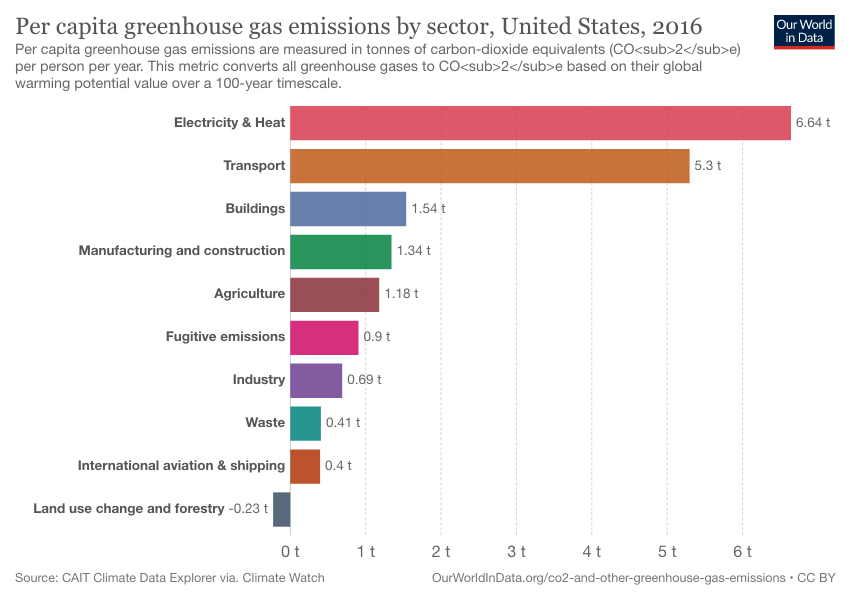

The main purpose of this work is to develop an agent that predicts whether a home is occupied at any certain time based on the household's electricity consumption. Consequently, these predictions can be used amongst others to provide recommendations for the user in order to adjust their energy consumption, reduce electricity costs and reduce CO2 emissions, which are the main goals of energy-efficient smart homes.
Past literature has developed different methods to estimate house occupancy in a smart home environment:


* Using Smart sensors (CO2 sensor, thermostats)



* Using more intrusive sensors (cameras, motion sensors)


* Using smartphone data from the occupants of the house



* Using electricity load from smart meters



Our work focuses on predicting house occupancy via electricity consumption, as smart meters continue to be more and more widely adopted. According to IoT Analytics, the penetration rate of smart meters in 2019 was almost 20% in the Asia Pacific region, 30-40% in North America, and around 80% in selected countries in Europe.
Another reason for why we choose to primarily use electricity meter data for our predictions is that the use of smart sensors is relatively costly and intrusive in comparison, as they require installation of hardware (Becker & Kleiminger, p.25) and can be error prone (Shih et al., p.1; Ardakanian et al., p.1). Considering the use of smart devices (e.g. smarthones or smart watches), it is fair to say that this approach raises privacy issues since it requires all data on the movements of the residents throughout their daily routine to be accessible. 

Existing academic literature on occupancy prediction mostly focuses on real-time occupancy detection and its further application in smart energy-saving/personal comfort systems rather than on the estimation of future occupancy patterns. The data used by researchers is diverse but in general comprises readings from smart sensors. For example, Beltran and Cepra (2013) use the readings from PIR and thermal array sensors to predict the headcount in different rooms of office building, while the model of Yang and Becerik-Gerber (2015) uses various ambient sensor readings (light, sound, motion, CO2) as an input and estimates real-time occupancy (binary response and number of persons) in several rooms of different non-residential buildings. Many works also use smartphone data to make more precise predictions about the user’s situation - indoor-outdoor localization and activity recognition (Jun et al., 2013; Stisen et al., 2015). 

A plethora of various ML and statistical techniques have been used within the occupancy prediction approaches suggested by researchers. Sangogboye and Kjaergaard (2016) developed a learning-free probabilistic algorithm to estimate the occupancy count with the use of cameras. Some of the papers mentioned above adopt supervised learning with multiple algorithms applied (most common are KNN, artificial neural networks, Naive Bayes and SVM). Apart from that, semi-supervised learning techniques like weighted principal component analysis (Shih et al. , 2016) and co-training of classifiers (Radu et al., 2014) find their application in occupancy prediction models.

It has also been observed that the fusion of several sensing approaches and methods may result in better accuracy of predictions. For example, Pratama et al. (2018) in their paper apply KNN algorithm to the readings from smart meters on power consumption and the smartphone data retrieved with the use of Bluetooth beaconing to predict headcount in a smart office building. The results showed that the model that uses both kinds of data performs better than those that embed the data from a single source.  

To our best knowledge, research until now has focused primarily on achieving the most accurate occupancy predictions with less focus on generalizability. Thus, we identified the construction of an agent that achieves good predictive power while also generalizing well to foreign datasets to be a knowledge gap at the time of writing. 

Our research question, aiming at closing this gap, is how we can build an agent that can provide the best possible estimates for future occupancy while still being generalizable enough to transfer well to previously unknown datasets of different structure.



This paper is organized as follows: 
- Firstly, we briefly go over the methodology and the different steps in our model and approach. We present the different datasets and their unique characteristics, as well as the process of their aggregation and cleaning. We continue with the explaination of our approach of feature engineering and the way we trained our models: We mention the algorithms we chose to implement, how the models performed with baseline (manually engineeered) features and we evaluate the features that were generated by our genetic algorithm. Apart from that, in this section we go over the different models and algorithms and evaluate their performance and investigate into the results

- In the next section, we examine the importance of the features used in our models applying different methods and also analyze the explainability of the models with SHAP approach.

- Thirdly, we put our agent in action to demonstrate the way it functions and its overall usefulness.

- Lastly, we discuss our approach, the shortcomings and issues we faced, and motivation for further exploration and research.

The birdview perspective on the project is provided by the roadmap below. It is important to mention that present occupancy predictions are produced by label-inferring model and the process of making such predictions will be futher referred to as inferring the labels.


**Roadmap of the project**

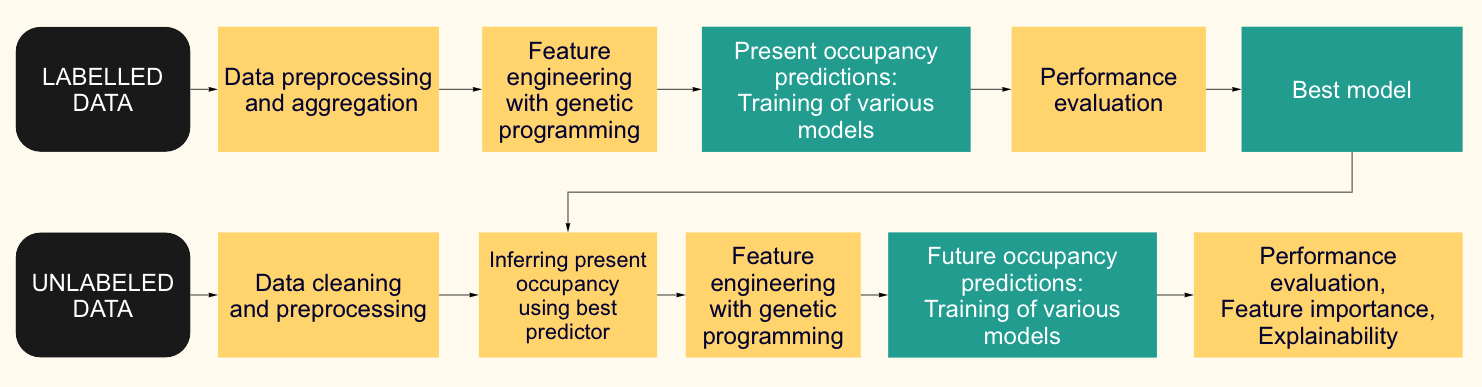

# 2. Development of the models

## 2.1. Datasets and aggregation

In a first step, we transform all available datasets so that they have an identical structure. Since the datasets provide measurements in different intervals, we aggregate the data on an hourly level and normalize it to rule out any unit differences or differences in scale caused by different size of housing and their equipment with appliances.

The available datasets that include both smart meter readings in kWs and occupancy labels are rather limited in terms of number of different households present and the timespan of values. Thus, we infer occupancy labels for two large but unlabeled datasets (CBT & REFIT) using a model trained on smaller datasets that include occupancy labels (Smart*, ECO & DRED), following the approach of Razavi et al. (2019). As the labels for larger datasets are inferred, they are used as an input for the models built to predict occupancy of smart homes in the future.

Our research showed that absolute energy consumption levels are often not sufficient as input to make the best possible predictions. We therefore use genetic programming to automate the feature generation process and come up with meaningful features based on energy consumption. This should enable the model to be highly generalizable due to genetic algorithm capturing the fittest way to aggregate the smart meter readings for various households, but at the same time improve predictive accuracy. 

It is important to provide the data to both our label-inferring model and the final agent in the correct format. Since the structure of datasets often varies in terms of order, naming and aggregation intervals this process needs to be performed manually.

The table below provides an overview over the datasets that we use. The first three datasets Smart*, ECO and DRED contain occupancy labels and are the basis for training the occupancy-label inferring model. The fourth and the fifth datasets, CBT and REFIT, are significantly larger but do not contain any information on the timing of the occupancy of the houses. Using the abovementioned first model we infer these labels and use the obtained data to train the models predicting future occupancy.

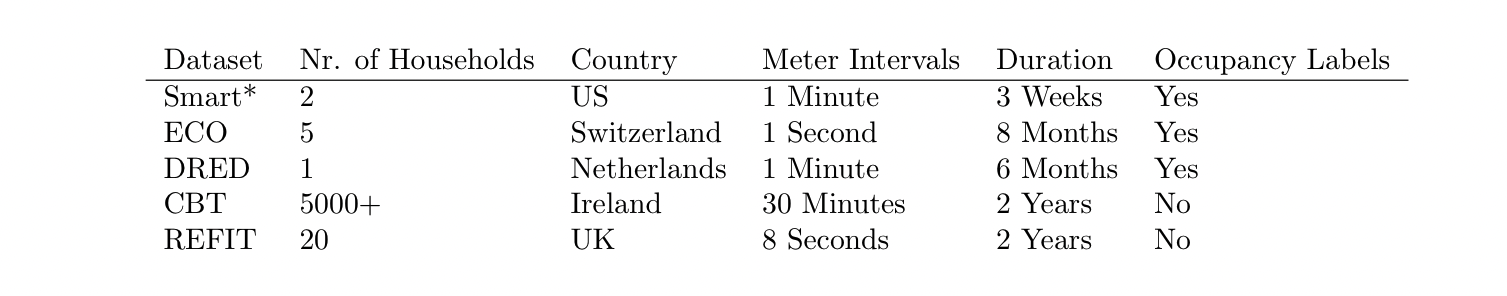

### a. Smart* dataset
The Smart* (NIOM) dataset was released in 2017 and includes data from two homes located in Western Massachussets. The data encompasses the period of three weeks  and is presented in minutely intervals. For one of the homes, two different time periods are considered: in spring and in summer of 2013. 

Below presented is the code we wrote in Python 3.6 that performs the aggregation and cleaning of this dataset.

In [1]:
#@title  { display-mode: "form" }
# packages

import os
import numpy as np
import pandas as pd

from datetime import datetime, timedelta, date

from copy import copy

from sklearn.preprocessing import StandardScaler

***Initial processing***

Initially each of the three subsets of data provided by SMART is processed separately.
First, we define two functions that extract the occupancy and power consumption data from the separate files.

In [6]:
#@title  { form-width: "1%" }

# imports occupancy data from SMART*
def get_occ_smart(home, season, person):
    occ = pd.read_csv('selected/Home_'+home+'_'+season+'_person_'+person+'.txt',
                      sep=" ", header=None, )
    occ.drop(0, axis=1, inplace=True)
    occ.columns = ["date", "time", "occupancy_p"+person]
    occ['date'] = list(map(lambda x: datetime.strptime(x, '%m/%d/%y').date(), 
                           occ['date']))
    occ['time'] = list(map(lambda x: datetime.strptime(x, '%H:%M').time(), 
                           occ['time']))
    occ['home'] = home
    occ['season'] = season
    return occ

# imports power consumption data from SMART*
def get_power_smart(home, season):
    power = pd.read_csv('selected/Home_'+home+'_'+season+'_energytrace.txt', delimiter = "\t", header=None)
    power.drop(0, axis=1, inplace=True)
    power.columns = ["datetime", "power_usage"]
    power['date'] = list(map(lambda x: x.split()[0], power['datetime']))
    power['time'] = list(map(lambda x: x.split()[1], power['datetime']))
    power['date'] = list(map(lambda x: datetime.strptime(x, '%m/%d/%y').date(), power['date']))
    power['time'] = list(map(lambda x: datetime.strptime(x, '%H:%M').time(), power['time']))
    power['home'] = home
    power.drop('datetime', axis=1, inplace=True)
    power['season'] = season
    return power 

Next the data is cleaned and rearranged. Finally, data from different files is concatenated all together.

There are some timestamps for which the value of power consumption is missing. In such cases, the average value of power consumption over the hour corresponding to a missing value is used as a proxy.

Both houses from SMART* have two dwellers and the information for the individual occupancy state for each resident is given. We consider a house to occupied if at least one of the residents is at home. 

In [7]:
#@title  { form-width: "1%" }
#@title

# the list of indices used for iteration
smart_subsets = [('A','spring'),('A','summer'),('B','summer')]

# for-loop formatting the data in the necessary way 
for i,subset in enumerate(smart_subsets):
    occ_p1 = get_occ_smart(subset[0], subset[1], '1')
    occ_p2 = get_occ_smart(subset[0], subset[1], '2')
    occ = occ_p1.merge(occ_p2, how='left', on=['date','time','home','season'])
    power = get_power_smart(subset[0], subset[1])
    smart = pd.merge(occ, power, how='left', on=['date','time','home','season'])
    smart['hour'] = list(map(lambda x: x.hour, smart['time']))
    
    # filling NAs with hourly means
    hour_means = smart.groupby(by=['date', 'home', 'hour']).mean()["power_usage"]
    smart = smart.merge(hour_means, how='left', on=['date','home','hour'])
    smart['power_usage_x'] = smart['power_usage_x'].fillna(smart['power_usage_y'])
    smart.drop('power_usage_y', axis = 1, inplace=True)
    smart.rename({'power_usage_x':'power_usage'}, axis = 1, inplace=True)
    
    # aggregating the occupancy data
    smart['occupied'] = np.where(
        (smart['occupancy_p1'] == 1) | (smart['occupancy_p2'] == 1), 1, 0
        )
    smart.drop(['occupancy_p1','occupancy_p2'], axis = 1, inplace=True)
    

    if i==0:
        smart_data = smart
    else:
        smart_data = pd.concat([smart_data, smart], axis=0, ignore_index=True)

***Intra-day power consumption and occupancy***

Formatted dataset provides us with the values of power consumption and occupancy labels over the considered time period. Now we can visualise some fraction of data to get a better understanding of the present patterns.

On the chart below, the values of power consumption and occupancy labels for the specific day (05/04/2013) at Home  B as time series graphs.


In [ ]:
#@title Code that plots the chart { form-width: "1%" }
smart_day_05042013 = smart_data[smart_data['date']==datetime(2013, 4, 5)]

import time

smart_day_05042013['time'] = list(map(lambda x: datetime.strptime(
            str(x), '%H:%M:%S').time(), smart_day_05042013['time']))

import matplotlib
time = matplotlib.dates.date2num(smart_day_05042013['time'])
pd.plotting.register_matplotlib_converters()

plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(20,6))

ax2 = ax.twinx()
lns1 = ax.plot(smart_day_05042013['time'], smart_day_05042013['power_usage'], color='tab:blue', label='Power consumption')
lns2 = ax2.plot(smart_day_05042013['time'], smart_day_05042013['occupied'], color='tab:red', label='1 if Home is occupied')
ax2.yaxis.set_ticks(np.arange(0, 2, 1.0))

lns = lns1+lns2
labs = [l.get_label() for l in lns]

ax.set_title('Electricity consumption and occupancy in Home B (Smart*) on 05/04/2013')
ax.set_xlabel('Time')
ax.set_ylabel('kWh')
ax2.set_ylabel('Occupancy')
ax.grid(True)
ax.legend(lns, labs, loc='center left')

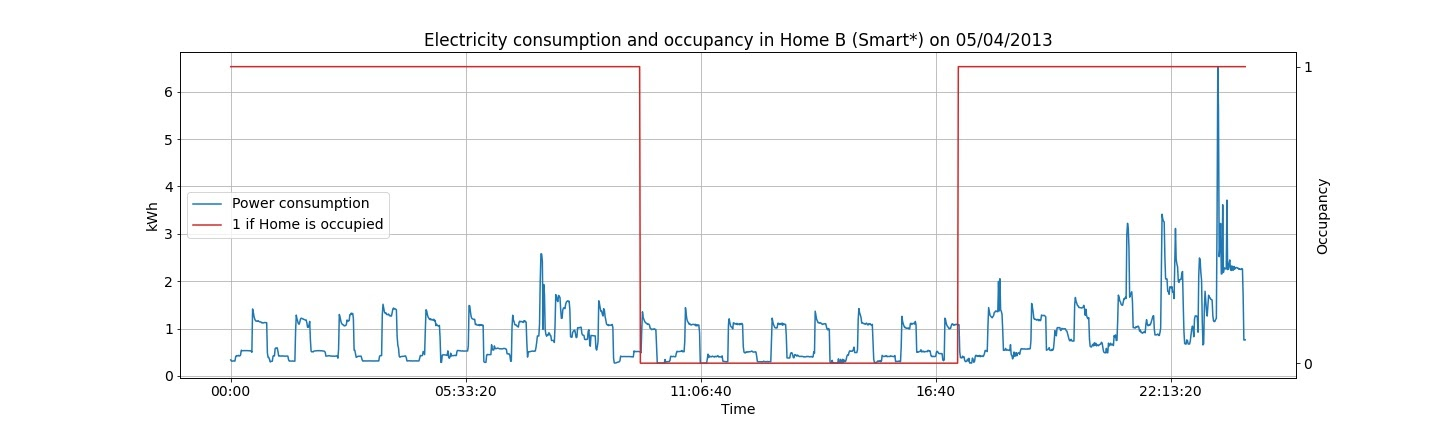

The chart demonstrates a common pattern: The house is fully vacant from around 10 AM to around 5 PM and it is occupied during the rest of the day. It is also notable that the power consumption of the household is cyclical. The same pattern repeats during most of the day approximately each hour. Another noteworthy point is that during the large part of the occupancy period (presumably when the residents are awake and active) we observe values that do not follow the usual cyclical pattern. Instead, there is higher overall consumption throughout these hours and we also observe higher variance of the consumption values. This leads us to the conclusion that the transformation of the values that our models could benefit from should capture the variance of the values or the level over some period. Unfortunately, since different datasets we are working with have different initial resolutions and some of them (e.g. CBT) are rather coarse-grained, we are not able to use the features that would bear information on the intra-hour fluctuations of the power consumption in our models. Nevertheless, we are still using this information on the inter-hour level within our genetic programming approach which will be reviewed later. 

***Aggregation on the hourly level and standardization***

Next step is to define the universal function that takes the dataframe of the format that follows from the preprocessing above and returns the aggregated dataset with the ultimate indexing for data points (specific household, date and hour of the day) and the aggregated values of power usage and occupancy. 

Since the final task is to predict the occupancy on an hourly level, we aggregate the data into one hour intervals. We define the occupancy label for the hour as "occupied" whenever any person is present in the home for more than half of that hour (more than 50% of the initial labels given for that hour are ones). As for the power consumption, we sum up all the values provided over the specific hour to obtain the total consumption for each hour.

Furthermore, at this point we scale the data (namely, the values of power usage) using regular standardization. The standardization has proven to improve the performance of the model given the unknown data and thus the generalizability of the agent.

The following function is used to process all other datasets as well.

In [9]:
#@title Important function { form-width: "1%" }
#@title  { form-width: "1%" }
## creating aggregated dataset with hour-level data
## occupancy in the hour is implied when any person is present at home more than half of that hour

def agg_by_hour(df, index_agg, index_scale, occupancy=True, scale=True):

    # aggregating power consumption on the hourly level
    df_hl = df.groupby(by=index_agg).sum()
    df_hl.rename(columns={"power_usage": "total_usage"}, inplace=True)

    # aggregating occupanc on the hourly level
    if occupancy:
        df_hl['occupied'] = df.groupby(by=index_agg).mean()["occupied"] 
        df_hl['occupied'] = np.where(df_hl['occupied'] > 0.5, 1, 0)
    
    df_hl.reset_index(inplace=True)

    # scaling
    if scale:
        scaler = StandardScaler()
        if len(index_scale) == 2:
            scale_list = list(set(zip(*(df_hl[x] for x in index_scale))))
            for subset in scale_list:
                df_hl.loc[
                          (df_hl[index_scale[0]] == subset[0]) &  (df_hl[index_scale[1]] == subset[1]),
                         'total_usage'] = scaler.fit_transform(
                    np.array(df_hl.loc[(df_hl[index_scale[0]] == subset[0]) & (df_hl[index_scale[1]] == subset[1]),
                                       'total_usage']).reshape(-1, 1))
        if len(index_scale) == 1:
                df_hl['total_usage'] = scaler.fit_transform(
                    np.array(df_hl['total_usage']).reshape(-1, 1)
                    )
              
    return df_hl

In [10]:
#@title  { form-width: "1%" }

# applying the aggregation function
smart_data_hl = agg_by_hour(
    smart_data, index_agg=['home','season','date','hour'], 
    index_scale=['home','season']
    )   
smart_data_hl['dataset'] = 'SMART'    # adding dataset marker

### b. ECO dataset

The ECO (Electricity Consumption and Occupancy) dataset contains second-level electricity consumption and occupancy data from six Swiss households collected over a period of 8 months. It contains much more data points than SMART* dataset and is more difficult to process and aggregate due to complicated file structure. However, most of the steps of preprocessing are analogical to the preprocessing of SMART*


In [12]:
#@title { form-width: "1%" }
# list that encompasses the date of the time period
date_list = [date(2012, 6, 1) + timedelta(days=x) for x in range(245)]

# for-loop that formats and aggregates data - takes a long time to run!
for i in range(5*2):
    
    # importing and cleaning the data
    if i%2 == 0:
        df = pd.read_csv(f'ECO/0{i//2+1}_occupancy_csv/0{i//2+1}_summer.csv', 
                         sep=",", header=None).T
        season = 'summer'
    if (i%2 == 1) & (i != 7):
        df = pd.read_csv(f'ECO/0{i//2+1}_occupancy_csv/0{i//2+1}_winter.csv', 
                         sep=",", header=None).T
        season = 'winter'
    if i == 7:
        continue
    df.columns = df.iloc[0]
    df.drop(0, axis=0, inplace=True)
    df.rename(columns={np.nan:"time"}, inplace=True)
    df['time'] = list(
        map(lambda x: datetime.strptime(x[1:-1], '%H:%M:%S').time(), df['time'])
        )
    
    df.insert(1, 'date', df.columns[1])
    df.rename(columns={df.columns[2]:"occupied"}, inplace=True)
    df_dpl = df.iloc[:,0:3]
    df.drop(df.columns[[1,2]], axis=1, inplace=True)

    for j in range(df.shape[1] - 1):
        df.insert(1, 'date', df.columns[1])
        df.rename(columns={df.columns[2]:"occupied"}, inplace=True)
        df_dpl = df_dpl.append(df.iloc[:,0:3], ignore_index=True)
        df.drop(df.columns[[1,2]], axis=1, inplace=True)
    
    del df
        
    df_dpl['hour'] = list(map(lambda x: x.hour, df_dpl['time']))
    df_dpl.iloc[:,2] = df_dpl.iloc[:,2].astype('int64')    
    df_dpl['date'] = list(
        map(lambda x: datetime.strptime(x, '%d-%b-%Y').date(), df_dpl['date'])
        )
    
    for k in list(df_dpl['date'].unique()):
        for l in date_list:
            if k == l:
                df_dpl.loc[df_dpl['date'] == l,'power_usage'] = pd.read_csv(
                    f'ECO/0{i//2+1}_sm_csv/{str(l)}.csv', sep=",", header=None
                    )[0].values
    
    df_dpl.loc[df_dpl['power_usage']==-1, 'power_usage'] = np.nan
    
    # filling NAs with hourly means
    hour_means = df_dpl.groupby(by=['date','hour']).mean()["power_usage"]
    df_dpl = df_dpl.merge(hour_means, how='left', on=['date','hour'])
    df_dpl['power_usage_x'] = df_dpl['power_usage_x'].fillna(df_dpl['power_usage_y'])
    df_dpl.drop('power_usage_y', axis = 1, inplace=True)
    df_dpl.rename({'power_usage_x':'power_usage'}, axis = 1, inplace=True)
    
    del hour_means
    
    # adding markers and aggregating
    df_dpl.iloc[:,2] = df_dpl.iloc[:,2].astype('int64')
    df_dpl['season'] = season
    df_dpl['home'] = i//2+1
    df_hl = agg_by_hour(df_dpl, index_agg=['home','season','date','hour'], 
                        index_scale=['home','season'])  
    
    if i==0:
        eco = df_hl
    else:
        eco = eco.append(df_hl, ignore_index=True)
    
    del df_hl
    del df_dpl

eco['dataset'] = 'ECO'

C:\Users\Makar\anaconda3\envs\apa\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,24

C:\Users\Makar\anaconda3\envs\apa\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,24

C:\Users\Makar\anaconda3\envs\apa\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,24

C:\Users\Makar\anaconda3\envs\apa\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,24

C:\Users\Makar\anaconda3\envs\apa\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,24

C:\Users\Makar\anaconda3\envs\apa\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,24

C:\Users\Makar\anaconda3\envs\apa\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,24

C:\Users\Makar\anaconda3\envs\apa\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,24

### c. DRED dataset
The DRED (Dutch Residential Energy Dataset) dataset contains energy consumption and occupancy data from one Dutch household, gathered over a period of half a year on a minute level. This labelled dataset differs drastically from the two datasets presented above in a way that will be discussed further.

In [ ]:
#@title  { form-width: "1%" }
#@title 
from dateutil.parser import parse

# importing occupancy data
dred_occupancy = pd.read_csv('DRED/Occupancy_data.csv', header=None)
dred_occupancy.rename(columns={0:"datetime_wo_tz",1:'location'}, inplace=True)
dred_occupancy['datetime_wo_tz'] = list(
    map(lambda x: parse(x), dred_occupancy['datetime_wo_tz'])
    )
dred_occupancy['datetime_wo_tz'] = list(
    map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'), 
        dred_occupancy['datetime_wo_tz']))

# importing power consumption data
dred_power = pd.read_csv('DRED/Aggregated_data.csv')

# cleaning
dred_power.columns = dred_power.iloc[0]
dred_power.drop(0, axis=0, inplace=True)
dred_power.rename(columns={np.nan:"datetime"}, inplace=True)
dred_power.drop(1, axis=0, inplace=True)
dred_power['mains'] = dred_power['mains'].astype('float64') 
dred_power = dred_power.dropna()
dred_power.reset_index(inplace=True)
dred_power.drop('index', axis=1, inplace=True)
dred_power['date'] = list(map(lambda x: x.split()[0], dred_power['datetime']))
dred_power['time'] = list(map(lambda x: x.split()[1], dred_power['datetime']))
dred_power['date'] = list(
    map(lambda x: datetime.strptime(x, '%Y-%m-%d').date(), dred_power['date'])
    )
dred_power['time'] = list(map(lambda x: parse(x), dred_power['time']))
dred_power['hour'] = list(map(lambda x: x.hour, dred_power['time']))
dred_power['datetime_wo_tz'] = list(
    map(lambda x: parse(x, ignoretz=True), dred_power['datetime'])
    )

dred_power['datetime_wo_tz'] = list(
    map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'), 
        dred_power['datetime_wo_tz']))

# merging things together
dred = dred_power[['datetime_wo_tz','hour','mains']].merge(
    dred_occupancy, how='left', on='datetime_wo_tz')
dred['located'] = np.where(dred['location'].isnull(), 0, 1)
dred['date'] = list(map(lambda x: x.date(), dred['datetime_wo_tz']))

# filling NAs with hourly means
hour_means = dred.groupby(by=['date','hour']).mean()["mains"]
dred = dred.merge(hour_means, how='left', on=['date','hour'])
dred['mains_x'] = dred['mains_x'].fillna(dred['mains_y'])
dred.drop('mains_y', axis = 1, inplace=True)
dred.rename({'mains_x':'power_usage'}, axis = 1, inplace=True)

# auxiliary function that allows to approximate the occupancy labels 
# for each hour given DRED structure of the data
def cons_zeros(a):
    s = a.ne(0)
    b = s.cumsum()[~s].value_counts().max()
    return(b)

dred['home'] == 'A'
dred_hl = agg_by_hour(dred, index_agg=['date','hour'], 
                        index_scale=['home'], occupancy=False)  
dred_hl['occupied'] = dred.groupby(
    by=['date', 'hour'])['located'].agg(cons_zeros).values
# we consider home to be occupied if there is some signal about any area occupancy
# within the less than half an hour suring the hour of interest
dred_hl['occupied'] = np.where(dred_hl['occupied'] < 1800, 1, 0)
dred_hl.reset_index(inplace=True)
dred_hl['dataset'] = 'DRED'

Unlike the two previous datasets, DRED does not contain occupancy labels for the whole household over specific period (minute/second). Information about occupancy is given in the form of location markers rather randomly scattered across the timeline. Seemingly, each single case when the detecting devices registered the presence in some area of the house is present in the data. This makes the data much less easier to understand and the occupancy labels resulting from the aggregation of such markers may not be that accurate. 

The concern is aggravated by very unusual patterns in the aggregated dataset. Any descriptive statistics or analytical grouping demonstrate that the house seems to be not occupied more than 90% of the entire period (6 months) which is completely uncommon. 

In [5]:
# makes the table that shows the list of days when the share of hours 
# when the house is occuied is 0 (the house is unoccupied the whole day)
pd.DataFrame(dred_hl.groupby(
    by='date')['occupied'].mean()).query('occupied == 0')

occupied
date                
2015-07-11       0.0
2015-07-19       0.0
2015-08-19       0.0
2015-08-20       0.0
2015-08-21       0.0
2015-08-22       0.0
2015-08-27       0.0
2015-08-28       0.0
2015-08-29       0.0
2015-09-08       0.0
2015-09-09       0.0
2015-09-10       0.0
2015-09-11       0.0
2015-09-12       0.0
2015-09-13       0.0
2015-09-17       0.0
2015-09-18       0.0
2015-09-19       0.0
2015-09-28       0.0
2015-09-30       0.0
2015-10-06       0.0
2015-10-10       0.0
2015-10-12       0.0
2015-10-16       0.0
2015-10-17       0.0
2015-10-20       0.0
2015-10-27       0.0
2015-10-28       0.0
2015-10-29       0.0
2015-10-30       0.0
2015-10-31       0.0
2015-11-01       0.0
2015-11-02       0.0
2015-11-03       0.0
2015-11-04       0.0
2015-11-05       0.0
2015-11-06       0.0
2015-11-07       0.0
2015-11-11       0.0
2015-11-12       0.0
2015-11-14       0.0
2015-11-15       0.0
2015-11-25       0.0
2015-11-26       0.0
2015-12-01       0.0

The table generated by the code above shows that DRED has continuous streaks of days when the house was not occupied at all. Whether the residents actually frequently left the house for several days, or the large part of values is missing, or we misinterpret the given data, the clear thing is that, in its current state, DRED shows much different dynamics of values compared to other datasets being considered. The simpliest way to observe is to get the fraction of hours when the housing is occupied across the whole time period for each of the three datasets.

In [13]:
print(f"The total share of the occupancy hours in SMART* is {smart_data_hl['occupied'].mean():.2f}")
print(f"The total share of the occupancy hours in ECO is {eco['occupied'].mean():.2f}")
print(f"The total share of the occupancy hours in DRED is {dred_hl['occupied'].mean():.2f}")

The total share of the occupancy hours in SMART* is 0.78
The total share of the occupancy hours in ECO is 0.80
The total share of the occupancy hours in DRED is 0.11


While it is rather plausible that the house on average is occupied 78% or 80% of the time, it is not that much likely that the residents are at home only 11% of the time - even if it is true we cannot gain a lot from such data.

Another way to present the overall pattern in a dataset is a heatmap based on the average values of hourly energy consumption throughout a week. Below presented are such heatmaps for specific smart homes presented in SMART*, ECO, and DRED datasets. 

In [ ]:
#@title Code to create a heatmap { form-width: "1%" }

smart_data['weekday'] = list(map(lambda x: x.weekday(), smart_data['date']))

home_b = smart_data[smart_data['home']=='B']
avg=pd.DataFrame(home_b.groupby(by=["hour","weekday"]).mean()['power_usage'])
avg['power_usage'] *= 1000
avg= avg.reset_index()

avg_pivot= avg.pivot("hour","weekday","power_usage")
avg_pivot.columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))    
g=sns.heatmap(avg_pivot)
locs, labels = plt.yticks()
plt.setp(labels, rotation=0)

g.figure.savefig("heatmap.jpg")

**Average electricity consumption in a smart home in Western Massachusetts U.S. in July 2013 (Smart*)**
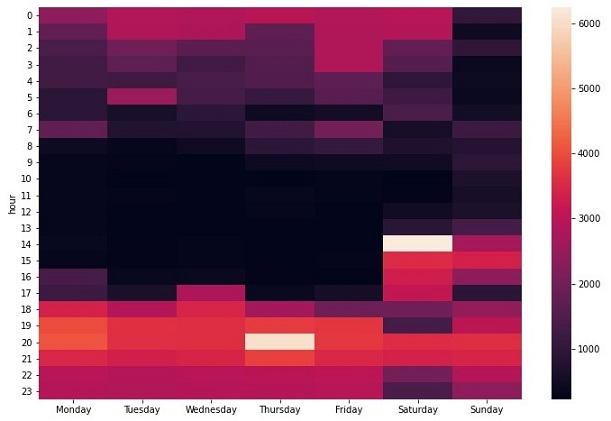

**Average electricity consumption in a smart home in Switzerland from 
June 2012 to January 2013 (ECO)**

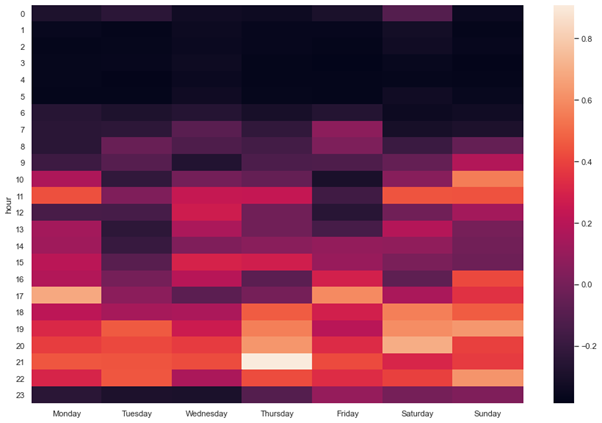

**Average electricity consumption in a smart home in the Netherlands from June 2012 to January 2013 (DRED)**
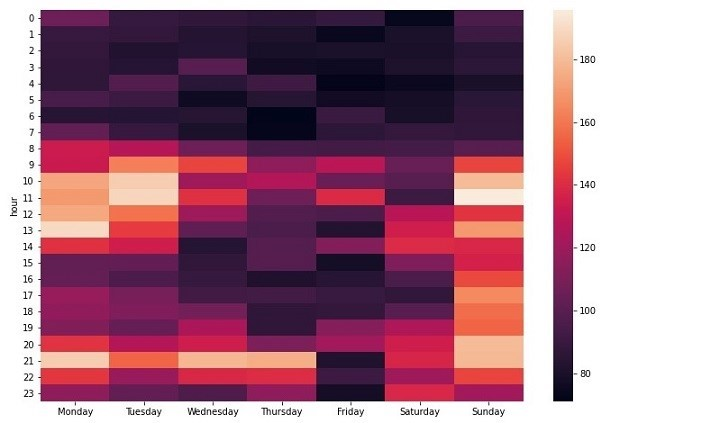




It can be clearly seen from the heatmaps above that some common recurring dynamic of values in different datasets: higher energy consumption in the evening when the residents are usually at home and active and lower consumption at night and during the regular working hours when they are likely to be either sleeping or at work. Moreover, higher consuption throughout the day on weekends is also to be observed for different households. 

Some explicit dissimilarities in the patterns (different relative levels of consumption at night and in the afternoon) are also clearly visible. The most glaaring ones are related to DRED, its heatmap looks very untypical, the only thing that is similar to the two other ones is low power consumption at night. However, for some reason, consumption of power in the house presented in DRED differs substiantially for various weekdays: it is very high on Sunday (but not on Saturday), slightly lower on Monday and Tuesday, and the lowest on Friday where it actually seem to correspond to the very frequent absense of residents in the house. This intriguing dynamic of comsumption values may be related to an unorthodox weekly routine of the residents or unusual schedule of the functioning of the smart systems. 

As the pattern of DRED is that much different from the one that is present across all the other datasets, we are very confident that inclusion of DRED in the input of label-inferring model will result in the less accurate estimates of occupancy periods for unlabelled datasets and, eventually, in the poorer performance of our agent that predicts the future occupancy. Therefore, we have decided to exclude DRED dataset from our training input. 

### d. Concatenation

As the data is aggregated and brought to the same format, we can concatenate everything into a single dataset. Besides, we define the set and the order of features and indices.

In [ ]:
#@title  { form-width: "1%" }
# ordered list of features
order_features = ['dataset','home','date','hour','total_usage','occupied',]

# ordering the datasets
smart_data_hl = smart_data_hl[order_features]
eco = eco[order_features]

# concatenation
labelled_data = pd.concat([smart_data_hl, eco], axis=0, ignore_index=True)
# saving
labelled_data.to_csv('labelled_data.csv',index=False)


## 2.2. Feature engineering and label-inferring model

With the cleaned and aggregated dataset that can be used for model training, we start with engineering features that will serve as an input for our predictive models. The first point of interest to us is the model that we will use to infer the values of our target variable (occupancy state) for the large datasets that do not contain this information.


### 2.2.1. Machine Learning algorithms

Label-inferring model fulfills the task of binary classification - prediction of occupancy state in the specific hour (1 if the house is occupied and 0 if the house is not occupied). As an input it has smart meter readings and some information about the period for which the prediction is made. For this model, we are applying various algorithms of binary classification and compare the corrensponding values of performance metrics to determine for which algorithm the fit is the best and to choose is as the best model. Algorithms that we consider are gradient boosting (namely, LightGBM), random forest (RF), support vector machine (SVM) and k-nearest neighbors (KNN).

Our final task is to develop the model that uses the information known up to the present hour and predicts the probability of the house occupancy for each of the following 24 hours. We design our ultimate model as binary classifier as well (we elaborate on our approach later in this chapter). Hence, we are able to use the input similar to the one of label-inferring model and the same algorithms of binary classification (LGB, RF, SVM, and KNN). One minor difference is that output of the label-inferring model is the predicted values of binary variable (zeros and ones), while the output of the future occupancy predictor is estimated probabilities - values within the range from 0 to 1 that are not further transformed into binary predictions with the use of a cutoff. 


### 2.2.2. Manually engineered features and baseline model

***Initial set of features***

We start the development of our label-inferring model with the manual engineering of some simple features which will serve as the input to our baseline model. Later we will aim to improve the performance of the model by adding the features generated by our genetic algorithm to the input.

Below the list of the features of the baseline model is presented.

In [27]:
#@title Importing the data to skip the previous steps { form-width: "1%" }
#@title  { form-width: "1%" }
# upload the data preprocessed and aggregated in section 2.1
labelled_data = pd.read_csv('labelled_data.csv')
#format the date
labelled_data['date'] = list(map(lambda x: datetime.strptime(str(x), '%Y-%m-%d'), labelled_data['date']))

1. **Hour of the Day**

During the night, most people are at home but do not actively use any appliances. There are of course sources of consumption that continue to run, but those often have a rather small and homogeneous rate of consumption. Thus, the consumption patterns at night look very similar to the ones during unoccupied periods, which can also be seen in the figure plotting consumption against occupancy from 00:00 to around 07:00 (see Section 2.1.a). We tried utilizing a dummy variable for nighttime, but the results from just using the hour of the day were better, which is why we excluded the dummy variable. 

Variable *hour* that accounts for the hour of the day has been created on the stage of data cleaning and aggregation. 

2. **Weekend Dummy**

People tend to have a regular schedule that repeats every weekday. This schedule usually differs from the daily routine on the weekend (on the weekend people may stay at home during the day or leave as well for both days). In order to account for this, we also include a variable that specifies whether a day is a workday or part of the weekend.

In [15]:
# creating variables for day of the week and weekend dummy
labelled_data['weekday'] = list(map(lambda x: x.weekday(), labelled_data['date']))
labelled_data['weekend'] = np.where((labelled_data['weekday'] == 5) | (labelled_data['weekday'] == 6), 1, 0)

3. **Month**

Adding numeric values for the month can help the model to account for seasonality. This includes both seasonal events like Christmas and other public holidays, as well as differences in daily sun hours, which heavily influence sleeping times and electricity consumption for lighting.

In [16]:
labelled_data['month'] = list(map(lambda x: x.month, labelled_data['date']))

4. **Hourly power consumption 24 hours ago**

This lagged variable helps the model to pick up on patterns reoccurring daily like wake-up times, working hours, etc.

In [17]:
# combining date and hour of the day to get timestamp i nthe datetime format 
# for indexing
new_var = []
for i, row in labelled_data.iterrows():
    new_var.append(row['date'].replace(
        hour = row['hour']))
labelled_data['datehour'] = new_var
  
labelled_data.sort_values(by = ['dataset','home','datehour',], 
                          ignore_index=True, inplace=True)

#@title  { form-width: "1px" }
# function to create lagged variables based on series of energy consumption
def lag_variable(df, lag):
    series = np.where((df['home'] == df['home'].shift(-lag)) & ((df['datehour'] \
        - df['datehour'].shift(-lag)) == timedelta(hours=-lag)) & \
        (df['dataset'] == df['dataset'].shift(-lag)), \
        df['total_usage'].shift(-lag), float(np.nan))

In [18]:
# variable 'power consumption 24 hours ago'    
labelled_data['usage_-24'] = lag_variable(labelled_data, -24)

5. **Hourly power consumption 24 hours later**

Since the inferring of the labels does not imply the prediction, we cannot face any data leakage. Thus we are able to use not only past values of energy consumption but also the value for the hour for which the prediction is made, as well as the hourly consumption of energy in the future (with relation to the hour of prediction). We have in the model input the hourly energy consumption 24 hours from the current hour. Once again, this feature captures daily patterns as the previous one.

In [19]:
# variable 'power consumption 24 hours later'    
labelled_data['usage_24'] = lag_variable(labelled_data, 24)

6. **Past, current and future values of hourly power consumption**

To provide the model with context, for each hour we include a window of +-10 hours of energy consumption data in the input (from 10 hours ago to 10 hours later) - 21 features in total.

In [20]:
# remaining historic values of energy consumption
for i in range(-10,10):
        labelled_data['usage_'+str(i)] = lag_variable(labelled_data, i)

***Note: Weather data***

We suspected weather information like temperature, rain, sunrise and sunset to have an influence on the time that people spend at home. For example, on a rainy weekend, people would probably spend more time at home, while on a sunny weekend they should have a higher probability of going out. It also occured to us that these factors might also influence the energy consumption and including them in the models could thereby help to account for this noise in the consumption data. Therefore we fetched both historic (label inferring) and forecast (future occupancy prediction) weather data and incorporated it into our models. 

Unfortunately, we found that this additional information did not increase the performance of our models in any significant way, sometimes even decreasing it. One explanation for this might be the lack of information about the exact locations of all homes. For the ECO dataset for example, the only information we have is that the homes were situated in Switzerland. Thus, we tried to use different cities as locations, which did not provide satisfying results. This is not suprising, keeping in mind that the weather in Zurich, Geneva and a small town in the mountains can be drastically different at the same point in time.

Since we also do not have exact locations for all of the homes in our larger datasets CBT and REFIT, we therefore decided to not include weather information for inferring labels and making predictions.


***Input finalization and hyperparameter tuning***

We create the final dataset for training input and tune the hyperparameters of the models, it contains 7632 data points of 26 features each. For hyperparameter tuning we use the framework by Optuna, which performs the dynamic optimization of hyperparameter space with the Bayesian approach named Sequential Model-Based Optimization. Optuna has shown the ability to search for the better set of hyperparameters (in terms of metrics optimization) with the fewer iterations than common methods like grid search and random search (Akiba et al., 2019). 

In [ ]:
# creating the list of input features
baseline_features = ['usage_-24','usage_24'] + ['usage_' + str(i) for i in list(range(-10,11))] 
baseline_features.remove('usage_0')
baseline_features += ['month','weekend','hour','total_usage']

from sklearn.model_selection import GroupKFold, KFold
from sklearn import metrics

# removing NAs since not all models can handle them
dataset = labelled_data.dropna()
dataset.reset_index(inplace=True, drop=True)


In [34]:
# important column necessary to make splits of the dataset
dataset['cv_index'] = list(zip(dataset['dataset'], dataset['home']))

# input array and target array
X = dataset[baseline_features].values
y = dataset['occupied'].values

C:\Users\Makar\anaconda3\envs\apa\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# tuning hyperparameters of LightGBM model

import lightgbm
dtrain = lightgbm.Dataset(X, label=y)

from sklearn.model_selection import TimeSeriesSplit, train_test_split
import optuna.integration.lightgbm as lgb

# optimization of hyperparameters with Optuna framework
params = {
    "objective": "binary",
    "metric": "auc",
    "verbosity": -1,
    "boosting_type": "gbdt",
}


tuner = lgb.LightGBMTunerCV(
    params, dtrain, verbose_eval=100,folds=KFold(n_splits=4)
)
tuner.run()

# changing the names of parameters in the dictionary to supress warnings during fits
best_params = tuner.best_params
best_params['colsample_bytree'] = best_params.pop('feature_fraction')
best_params['reg_alpha'] = best_params.pop('lambda_l1')
best_params['reg_lambda'] = best_params.pop('lambda_l2')
best_params['subsample_freq'] = best_params.pop('bagging_freq')
best_params['subsample'] = best_params.pop('bagging_fraction')

best_params
lightgbm_infer = lightgbm.LGBMClassifier(**best_params)

In [ ]:
# tuning hyperparameters of RF

import optuna
from sklearn import linear_model
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection

def objective(trial):

    # in fact, algorithm tries random forest and logistic regression and 
    # chooses the algorithm with the best fit (which is higly likely to be RF)
    classifier_name = trial.suggest_categorical("classifier", ["LogReg", "RandomForest"])
    
    if classifier_name == 'LogReg':
        logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
        classifier_obj = linear_model.LogisticRegression(C=logreg_c)
    else:
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=rf_n_estimators
        )

    score = model_selection.cross_val_score(
        classifier_obj, X_new, y, n_jobs=-1, cv=KFold(n_splits=4)
        )
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

rf_params = study.best_params
rf_params
rf_infer = ensemble.RandomForestClassifier(
    max_depth=rf_params["rf_max_depth"], 
    n_estimators=rf_params["rf_n_estimators"]
    )

The tuning of number of nearest neighbors in KNN is done later since it requires some additional concepts to be brought up first.

***Cross-validation and performance of baseline models***

We evaluate the performance of the baseline models with cross-validated values of accuracy score and the area under ROC-curve (which will be further referred to as just AUC). 

One main goal for this work is to build an agent that is highly generalizable and works well with previously unknown datasets. Therefore, although we are dealing with time series in general and aiming at forecasting future values, the decision on the cross-validation approach was made in favour not of "sliding window" method which is common for our setting, but group k-fold cross validation. This means that we always split the data on the household level - the model is trained on the full data (the whole time period) provided for one group of houses and is tested on the data for another group of houses. This approach is preferable for our task, since it ensures that the predictions are always tested on previously unknown datasets and thus prevents data leakage.

In [24]:
#@title Importing the models to skip the previous steps { form-width: "1%" }
#@title  { form-width: "1%" }
# tuning woth Optuna can be skipped
# Below is the code to define the set of pre-tuned hyper parameters

# lgb model
import lightgbm

best_params = {'objective': 'binary',
                 'metric': 'auc',
                 'verbosity': -1,
                 'boosting_type': 'gbdt',
                 'feature_pre_filter': False,
                 'num_leaves': 28,
                 'min_child_samples': 50,
                 'colsample_bytree': 0.4,
                 'reg_alpha': 0.0,
                 'reg_lambda': 0.0,
                 'subsample_freq': 0,
                 'subsample': 1.0}

lightgbm_infer = lightgbm.LGBMClassifier(**best_params)

# rf model
from sklearn import ensemble

rf_infer = ensemble.RandomForestClassifier(max_depth=25, n_estimators=503)

In [25]:
#@title Important function { form-width: "1%" }

# function that group k-fold on the dataset, evaluates accuracy and AUC of the 
# model fro each split and returns the averages
def cv_acc_auc(model, X, y, df):
    gkf = GroupKFold(n_splits=4)
    auc_base = []
    acc_base = []
    for train, test in gkf.split(X, y, groups=df['cv_index']):
        model.fit(X[train], y[train])
        yhat = model.predict_proba(X[test])[:,1]
        ypred = model.predict(X[test])
        auc_base.append(metrics.roc_auc_score(y[test],yhat))
        acc_base.append(metrics.accuracy_score(y[test],ypred))
        

    print(auc_base)
    print(acc_base)
    print(f"Cross-validated AUC of the model is {np.mean(auc_base)}") 
    print(f"Cross-validated accuracy of the model is {np.mean(acc_base)}") 
    return(np.mean(auc_base),np.mean(acc_base))

In [36]:
# performance of LightGBM baseline
cv_acc_auc(lightgbm_infer, X, y, dataset)

[0.9644348731111997, 0.9324746637184447, 0.7815521067178801, 0.7925150876691782]
[0.8973063973063973, 0.872716894977169, 0.8923611111111112, 0.8260135135135135]
Cross-validated AUC of the model is 0.8677441828041756
Cross-validated accuracy of the model is 0.8720994792270478


(0.8677441828041756, 0.8720994792270478)

In [37]:
# performance of RF baseline
cv_acc_auc(rf_infer, X, y, dataset)

[0.9678016280944506, 0.9293080891837111, 0.6665828607762481, 0.7765819733599972]
[0.872895622895623, 0.8864155251141552, 0.8778935185185185, 0.793918918918919]
Cross-validated AUC of the model is 0.8350686378536017
Cross-validated accuracy of the model is 0.8577808963618039


(0.8350686378536017, 0.8577808963618039)

In [38]:
# performance of SVM baseline
from sklearn.svm import SVC
svm_infer = SVC(kernel='rbf',probability=True)

cv_acc_auc(svm_infer, X, y, dataset)

[0.911891097741661, 0.8808946010687304, 0.7992616430712534, 0.7768006999250081]
[0.7912457912457912, 0.8384703196347032, 0.8616898148148148, 0.8012387387387387]
Cross-validated AUC of the model is 0.8422120104516633
Cross-validated accuracy of the model is 0.823161166108512


(0.8422120104516633, 0.823161166108512)

The single hyperparameter of KNN we tune based on the average value of the AUC produced by group k-fold cross-validation. The interval of the search is from 2 to 50 nearest neighbors.

In [39]:
# tuning number of nearest noighbors
from sklearn import neighbors

aucs = {}
for i in range(2,51):
    
    model = neighbors.KNeighborsClassifier(n_neighbors=i)
    print(f"\nValues of AUROC for KNN with {i} neighbours")
    aucs[i] = cv_acc_auc(model, X, y, dataset)

# performance of KNN baseline
knn_infer = neighbors.KNeighborsClassifier(
    n_neighbors=max(aucs, key = aucs.get)
    )

cv_acc_auc(knn_infer, X, y, dataset)


Values of AUROC for KNN with 2 neighbours
[0.7730164542595049, 0.786888704625023, 0.7355588933729547, 0.6671535192657929]
[0.7895622895622896, 0.735730593607306, 0.6927083333333334, 0.6525900900900901]
Cross-validated AUC of the model is 0.7406543928808189
Cross-validated accuracy of the model is 0.7176478266482548

Values of AUROC for KNN with 3 neighbours
[0.8072083930677556, 0.8114372581536761, 0.76678659019244, 0.6935694389886797]
[0.8000841750841751, 0.7876712328767124, 0.7685185185185185, 0.7257882882882883]
Cross-validated AUC of the model is 0.7697504201006379
Cross-validated accuracy of the model is 0.7705155536919236

Values of AUROC for KNN with 4 neighbours
[0.8251273865253363, 0.8173567348442969, 0.7709990527230968, 0.7062457593829232]
[0.8072390572390572, 0.7551369863013698, 0.7355324074074074, 0.6920045045045045]
Cross-validated AUC of the model is 0.7799322333689133
Cross-validated accuracy of the model is 0.7474782388630847

Values of AUROC for KNN with 5 neighbours
[

[0.8667980898020564, 0.8392878201584668, 0.8365509388422461, 0.722013712816484]
[0.79503367003367, 0.7950913242009132, 0.8356481481481481, 0.7302927927927928]
Cross-validated AUC of the model is 0.8161626404048133
Cross-validated accuracy of the model is 0.789016483793881

Values of AUROC for KNN with 29 neighbours
[0.86709494729002, 0.8388879675695596, 0.8374755070526713, 0.7209441845516551]
[0.789983164983165, 0.7945205479452054, 0.8408564814814815, 0.7387387387387387]
Cross-validated AUC of the model is 0.8161006516159766
Cross-validated accuracy of the model is 0.7910247332871476

Values of AUROC for KNN with 30 neighbours
[0.866401687288189, 0.8379224249124747, 0.8355209374148426, 0.7204513802092634]
[0.789983164983165, 0.7876712328767124, 0.8350694444444444, 0.7297297297297297]
Cross-validated AUC of the model is 0.8150741074561924
Cross-validated accuracy of the model is 0.785613393008513

Values of AUROC for KNN with 31 neighbours
[0.8668127549174798, 0.8365496591118481, 0.8348

(0.8196936479324808, 0.7912515664013952)

The values of performance metrics for all baseline models considered are gathered in the table below.

**Value of performance metrics for baseline inferring models from group k-fold cross vaildation**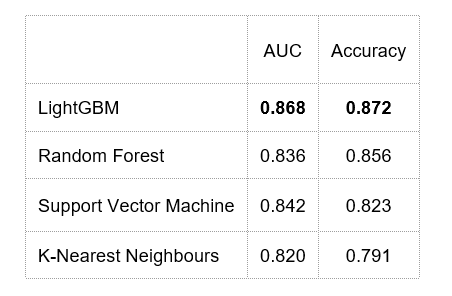

From the table, it is seen clearly that LightGBM baseline outperforms other models in terms of both accuracy and AUC value. Consequently, we are using this model throughout our further steps.

Another important thing to observe is how well the models on the data which is completely new in terms of its characteristics in origin. So far we have two datasets in out training input: SMART* and ECO. The quality of predictions for SMART with the models trained of ECO (since it is larger) may be of interest. Chart below has ROC-curves for the four considered algorithms with aforementioned split of data.

In [40]:
#@title  { form-width: "1%" }
#@title 
import random

# function that produces indices for specific split
def house_split_indices(df, cv_index, train_fraction, verbose):
    train_houses = random.sample(cv_index, round(len(cv_index)*train_fraction))
    test_houses = list(set(cv_index) - set(train_houses))
    if verbose:
        print(f"Households in the training data are {train_houses}")
        print(f"Households in the test data are {test_houses}")
    train_ix = df[df.cv_index.isin(train_houses)].index
    test_ix = df[df.cv_index.isin(test_houses)].index
    return train_ix, test_ix

cv_index = list(dataset['cv_index'].unique())

In [54]:
#@title  { form-width: "1%" }
#@title 

# cell should be rerun until you get both houses from SMART in the test set 

train_ix, test_ix = house_split_indices(dataset, cv_index, 0.75, verbose=1)

Households in the training data are [('ECO', '5'), ('ECO', '3'), ('ECO', '4'), ('ECO', '2'), ('ECO', '1')]
Households in the test data are [('SMART', 'A'), ('SMART', 'B')]


AUC for LightGBM: 0.9137609353621626
AUC for random forest: 0.8880965214146525
AUC for SVM: 0.9290186160288568
AUC for KNN: 0.938575396989925


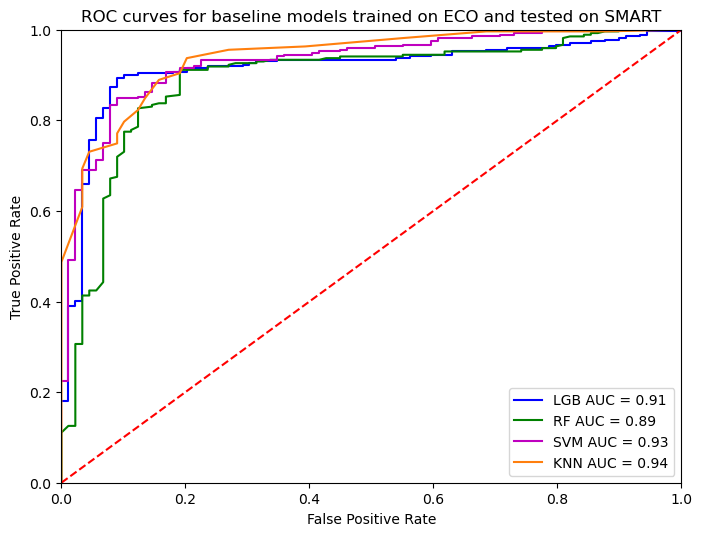

In [55]:
#@title Code to plot the chart { form-width: "10%" }
# plotting AUC for RF, LightGBM, KNN, and SVM models

import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6), dpi=100).clf()
plt.title('ROC curves for baseline models trained on ECO and tested on SMART')
lightgbm_infer.fit(
        X[train_ix], y[train_ix]
    )
predictions = lightgbm_infer.predict_proba(X[test_ix])[:,1]
fpr, tpr, threshold = metrics.roc_curve(y[test_ix], predictions)
roc_auc = metrics.auc(fpr, tpr)
print("AUC for LightGBM: {}".format(metrics.roc_auc_score(y[test_ix], predictions)))
plt.plot(fpr, tpr, 'b', label = 'LGB AUC = %0.2f' % roc_auc)

rf_infer.fit(
        X[train_ix], y[train_ix]
    )
predictions = rf_infer.predict_proba(X[test_ix])[:,1]
fpr, tpr, threshold = metrics.roc_curve(y[test_ix], predictions)
roc_auc = metrics.auc(fpr, tpr)
print("AUC for random forest: {}".format(metrics.roc_auc_score(y[test_ix], predictions)))
plt.plot(fpr, tpr, 'g', label = 'RF AUC = %0.2f' % roc_auc)

svm_infer.fit(
    X[train_ix], y[train_ix]
)
predictions = svm_infer.predict_proba(X[test_ix])[:,1]
fpr, tpr, threshold = metrics.roc_curve(y[test_ix], predictions)
roc_auc = metrics.auc(fpr, tpr)
print("AUC for SVM: {}".format(metrics.roc_auc_score(y[test_ix], predictions)))
plt.plot(fpr, tpr, 'm', label = 'SVM AUC = %0.2f' % roc_auc)

knn_infer.fit(
    X[train_ix], y[train_ix]
)
predictions = knn_infer.predict_proba(X[test_ix])[:,1]
fpr, tpr, threshold = metrics.roc_curve(y[test_ix], predictions)
roc_auc = metrics.auc(fpr, tpr)
print("AUC for KNN: {}".format(metrics.roc_auc_score(y[test_ix], predictions)))
plt.plot(fpr, tpr, 'tab:orange', label = 'KNN AUC = %0.2f' % roc_auc)
    
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

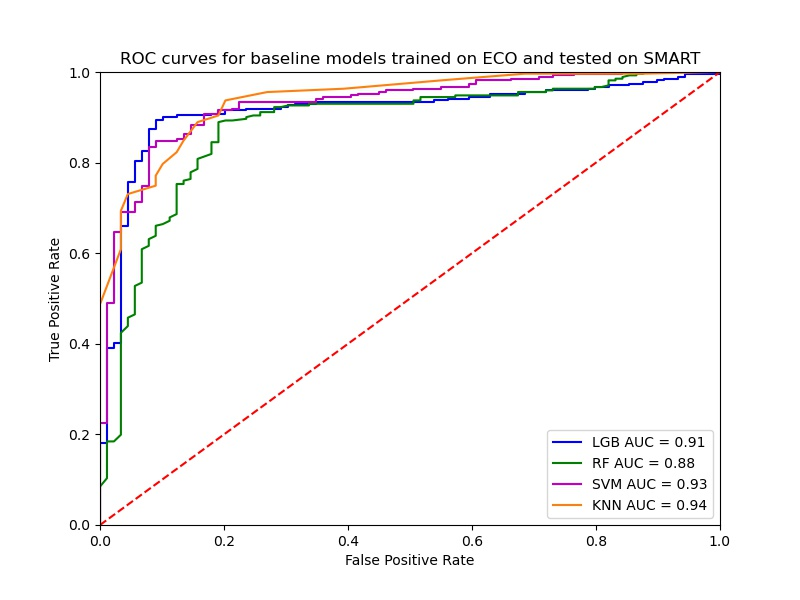

First of all, the chart demonstrates that all models show very impressive results on the unknown data (AUC close to 0.9 and higher).
Interestingly enough, on this specific split, SVM outperforms LightGBM. What is more, KNN also outperforms LightGBM and SVM as well. From the chart, we get that while LGB shows high TPR and low FPR given the threshold around 0.5, SVM and KNN perform better given higher and lower thresholds. We keep in mind this curious result but since the average AUC over 4 group CV folds seem to provide more robust check for generalizability and since the threshold for making predicitons/inferring labels is 0.5, we leave LightGBM model as our final choice.

### 2.2.3. Features engineered by genetic algorithm

We believe that adding some transformations of smart meter readings to the input of the model can substantially increase its predictive performance. However, it is  very difficult to say with certainty what window of values should we choose for the aggregation and what kind of aggregation/transformation should we apply to the set of values. The hyperspace of possible choices is simply too vast to allow us to determine the good points manually. Therefore, we address with issue with the help of genetic programming.

***Genetic programming***



Koza & Poli (2005) define Genetic Programming as "a systematic method for getting computers to automatically solve a problem starting from a high-level statement of what needs to be done." The basic idea is to start with a population of random programs (in our case, functions applied to our baseline features), which are then executed and evaluated (the evaluation of a program within the context of genetic programming is called fitness measurement). After the evaluation of each program, the new population (generation) of programs is generated by slightly altering the programs through different kinds of "mutations". The higher the fitness of the program (in our case, the uplift of the AUC when the feature generated following the program is added to the input of baseline model), the higher probability it has to pass their "genes" on to the next generation.

For our process, we use the set of primitive functions:

*   *Select(a,b)* - selects meter readings from position a to b
*   *SD()* - standard deviation
*   *SAD()* - sum absolute delta
*   *Mean()*
*   *Range()*
*   *Min()*
*   *Max()*
*   *Sum()*
*   *Ratio(a,b)* - returns the ratio of a and b
*   *Lesser(a,b)* - version of function *Min()* for two arguments
*   *Greater(a,b)* - version of function *Max()* for two arguments
*   *Add(a,b)* - version of function *Sum()* for two arguments   


Most of these functions are self-explanatory. Mean() will output the mean of the input data, Greater() will output the greater of two inputs, and so on. The only function that needs a short explanation is Select(). It defines how many data points act as input for the consequent functions. Select(a,b) defines the start (a) and end (b) point of the selected data window. Thus, Select(-5,0) would choose the past 5 data points - for our data that would be the past values of hourly energy consumption starting from 5 hours ago. Possible values of a and b for our label-inferring model are integers from -24 to 24 and b is obviously always greater than a - potential features can bear only the information from the previous 24 hours, the current hour, and the following 24 hours.

These functions can in combination first aggregate data from several consecutive hours and then capture either the inter-hour variance or other key characteristics of electricity consumption that allow us to compress the information from these hours into one single value.

These primitive functions are then combined into the complex expressions that can be represented like trees and this combinations are altered by the application of different operations similar to the natural genetic processes.


The possible genetic operations are:

*   Crossover
*   Subtree Mutation
*   Hoist Mutation
*   Point Mutation
*   Reproduction

The following explanations are taken from the documentation of a genetic programming package called *gplearn* (Introduction to GP — gplearn 0.4.1 Documentation, n.d.). One note important for understanding of the definitions below is that tournament implies that the subset of the programs from the previous generation is randomly chosen and the program in the subset with the highest fitness value becomes the winner of the tournament.
___

**Crossover** takes the winner of a tournament and selects a random subtree from it to be replaced. A second tournament is performed to find a donor. The donor also has a subtree selected at random and this is inserted into the original parent to form an offspring in the next generation.

**Subtree mutation** takes the winner of a tournament and selects a random subtree from it to be replaced. A donor subtree is generated at random and this is inserted into the parent to form an offspring in the next generation.

**Hoist mutation** takes the winner of a tournament and selects a random subtree from it. A random subtree of that subtree is then selected and this is “hoisted” into the original subtree’s location to form an offspring in the next generation.

**Point mutation** takes the winner of a tournament and selects random nodes from it to be replaced. Terminals (leaves) are replaced by other terminals and functions are replaced by other functions that require the same number of arguments as the original node. The resulting tree forms an offspring in the next generation.

**Reproduction** means that tournament winner is cloned and enters the next generation unmodified.
___

This example from Razavi et al. (2019) makes it easier to understand the concept. It shows two generated features in (a). In (b), a point mutation was applied two the second feature and the function SAD() was replaced by Range(). In (c), a crossover produced the combination of "genes" both features: left branch of the program (standard deviation of the previous 5 values) on the left is replaced by the feature on the right (sum absolute delta of the previous 4 values).  


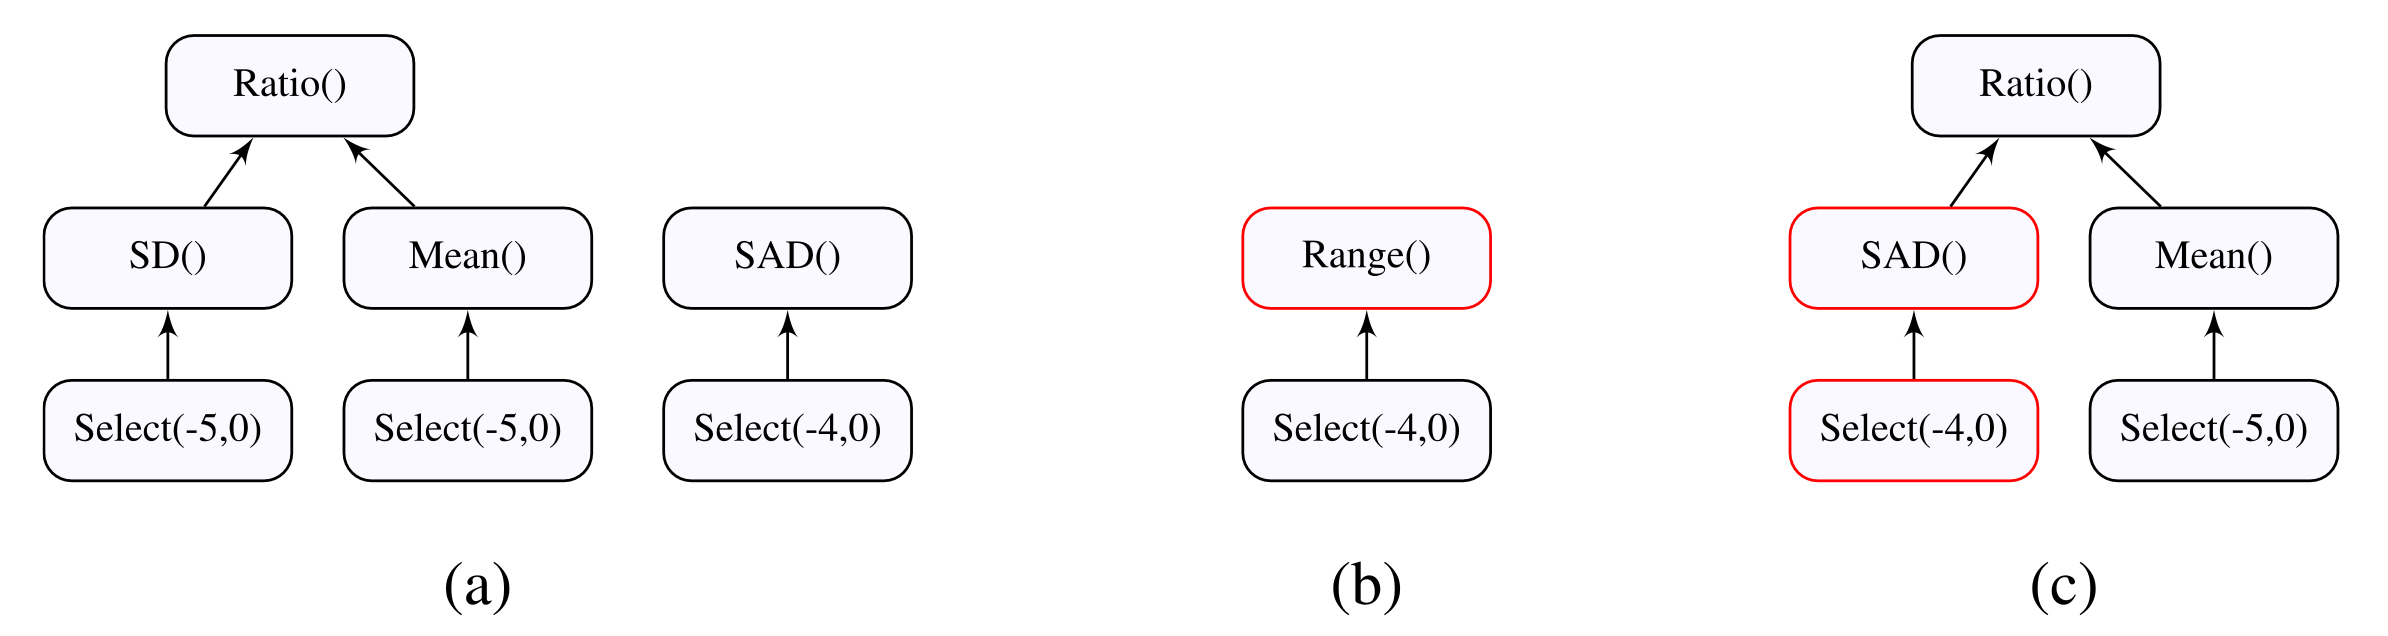

The idea of this genetic algorithm is that throughout this evolutionary process consisting of many generations fittest programs survive and develop which for us means that we obtain the features whose formulas are such combinations of functions with such parameters (namely, the window of values) that have some significant predictive power and thus are as beneficial as possible for our model. 


***The implementation of the algorithm***

There is no ready-to-use Python library that can implement our genetic algorithm. That is why we have written substantial amount of code based on the library *gplearn* that is able to implement our algorithm and wrapped it up in a package. The code randomly generates programs according to our set of functions and then creates the predefined number of generations by applying genetic operations over previous generation based on the value of fitness calculated for each program.

In [56]:
#@title Importing important functions
# importing our package and specific class and method
import gp_features
from gp_features._program import _Program
from gp_features.genetic import evolution

The code below creates an example of the random program which are the elements of our genetic algorithm and its tree visualization. Execution of this program creates the feature 

**Visualized example of a program in the genetic algorithm**

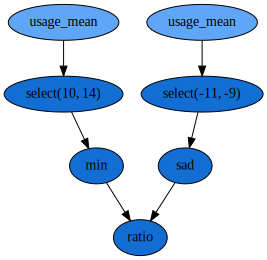

In [57]:
#@title Code to create a program and visualize it as a tree
# example of a randomly generated program object (generation 0)
program = _Program(
                 function_set = ['mean','range','sd',
                                 'sad','min','max',
                                 'sum','ratio','add',
                                 'greater','lesser'],
                 arities = {
                            'ratio':2,
                            'mean':1, 
                            'range':1,
                            'sd':1,
                            'sad':1,
                            'min':1,
                            'max':1,
                            'sum':1,
                            'add':2,
                            'greater':2,
                            'lesser':2
                },
                 df = dataset,
                 select_values = select_values,
                 init_depth = (3,5),
                 init_method = 'half and half',
                 p_point_replace = 0.33,
                 parsimony_coefficient = 0.0005,
                 first_gen=0,
                 n_features = 1,
                 random_state = np.random.RandomState(9025),
                feature_names=['usage_mean'],
                 )

program.__str__()

# visualization of the program
from graphviz import Digraph, Source
src = Source(program.export_graphviz())
src

The run of algorithm to obtain the features for label-inferring model includes 1,000 generations, 100 programs in each generation in total. Other important hyperparameters are tournament size (5) and the probabilities of crossover and reproduction (0.8 and 0.05, respectively). 

In [ ]:
#@title Important function { form-width: "1%" }
#@title  { form-width: "1%" }
# function that performs creation of baseline features, training dataset 
# and auxiliary array used in genetic algorithm

def get_baseline_features_and_data(df, future=False, labelled=True):
    
    df['night'] = np.where((df['hour'] >= 0) & (df['hour'] <= 5), 1, 0)

    df['weekday'] = list(map(lambda x: x.weekday(), df['date']))
    df['weekend'] = np.where((df['weekday'] == 5) | (df['weekday'] == 6), 1, 0)
    df['month'] = list(map(lambda x: x.month, df['date']))

    new_var = []
    for i, row in df.iterrows():
        new_var.append(row['date'].replace(
            hour = row['hour']))
    df['datehour'] = new_var
    
    df.sort_values(by = ['dataset','home','datehour',], ignore_index=True, inplace=True)

    for i in range(-24,25):
        df['usage_'+str(i)] = np.where((df['home'] == df['home'].shift(-i)) & ((
            df['datehour'] - df['datehour'].shift(-i)) == timedelta(hours=-i)) & (df['dataset'] == df[
        'dataset'].shift(-i)), df['total_usage'].shift(-i), float(np.nan))

    basic_features = ['usage_-24','usage_24'] + ['usage_' + str(i) for i in list(range(-10,11))] 
    basic_features.remove('usage_0')
    basic_features.append('month')
    basic_features.append('weekend')
    basic_features.append('hour')
    basic_features += ['total_usage']
    
    more_features = ['dataset','home','datehour','weekday','night']
    
    if labelled:
        more_features.append('occupied')

    dataset = df.dropna()
    
    # this array is used to get the output of function Select()
    select_values = dataset[['usage_' + str(i) for i in list(range(-24,25))]].values.T

    
    dataset.reset_index(inplace=True, drop=True)
    dataset['cv_index'] = list(zip(dataset['dataset'], dataset['home']))

    df['datehour'] = list(map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'), df['datehour']))
    dataset['datehour'] = list(map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'), dataset['datehour']))

    
    return dataset, basic_features, select_values

In [ ]:
#@title  Code to skip the preprocessing { form-width: "1%" }
dataset, baseline_features, select_values = get_baseline_features_and_data(labelled_data)

In [ ]:
# evolution of programs that develops new meaningful features for the model
# (!) takes from several hours to several days to run
gp_features_infer = evolution(
    X=dataset['total_usage'].values, y=dataset['occupied'].values, 
    df=dataset, select_values=select_values,
    baseline_features=baseline_features, 
    model=lightgbm_infer,
    train_fraction=0.7,
    population_size=100,
    hall_of_fame=100,
    generations=1000,
    tournament_size=5,
    init_depth=(3, 3),
    init_method='half and half',
    feature_names=['total_usage'],
    p_crossover=0.8,
    p_subtree_mutation=0.05,
    p_hoist_mutation=0,
    p_point_mutation=0.1,
    p_point_replace=0.33,
    parsimony_coefficient=0.0001,
    random_state=110,
    n_jobs=-1,
    warm_start=True, low_memory=False,
    verbose=1, programs=None)

import joblib
# saving the programs
joblib.dump(gp_features_infer, 'gp_features_infer.pkl')

The code above performs 1000 iterations, each consisting of the following steps:

1. For iteration 0, the first population of random programs is generated. For the following iterations, the new generation is created by applying genetic operations over the previous generation with the certain probability and based on the fitness of the programs in the previous population.

2. Random split on the dataset is made on the household level (5 houses in the training set and 2 houses in the test set). The split is different at each iteration.

3. The difference between the value of the AUC of the baseline model and the value of the AUC when the feature created by the program execution (AUC uplift) is calculated for each program as the measure of its fitness. The cross-validated values of the AUC are calculated given the split made at this iteration.

As the result, we have the fittest program (that produces the feature with the best AUC uplift) from each generation - 1,000 features in total. 

Initially we were planning to update the input solely with the features from the last generation since they are supposed to be the most developed and the fittest ones in general. Nonetheless, the first runs of the algorithm showed that throughout the generations programs tend to converge to the same forms, most of the programs in a generation are identical to each other. Eventually, the last generation may contain only 4-5 programs that produce distinct features and the difference of these features is not that significant, so the scope of the information these features encompass seems to be rather narrow. Hence, we think that the model can benefit from using other features generated by the algorithm with the high value of fitness. 

Another important issue related to the features of the last generation is that the way the features are selected for mutations and the way their fitness is assessed in each generation is affected greatly by the split corresponding to each specific iteration. Some transformations of the data can perform well on the some splits and very poorly on the others, that is why different splits move the evolutionary process and the development of the programs in slightly different directions. This stresses the issue of the data heterogeneity and also the importance of using various splits to validate the performance of the features. It is simply not feasible for us to consider all 21 possible splits of the dataset containing the information from the 7 houses at each iteration. Consequently, the best decision is to consider new single split every time. This also leads us to the idea of using the features from earlier generations that show good performance on various splits. 

***Choosing the optimal set of features***

The number of the functions that a program combines is initially restricted. Most of the resulting programs include 5 functions: root node of the tree is one of the function that takes two arguments (*Ratio()*, *Greater()*, *Lesser()*, or *Add()*) and each of this two arguments is a window of values selected by the function *Select()* processed by one of the remaining functions (*Mean()*, *Range()*, and so on). The table below shows the count of root functions for our final 1,000 resulting programs.



**Function in the root nodes of the resulting programs**

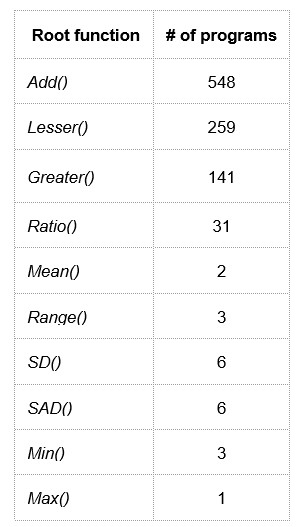

Most of the programs (548) have *Add()* as the root function, fewer but still many programs start from *Lesser()* and *Greater()*. Also, we get a limited number of simple programs (21) which consist of only two functions, one of which is *Select()* and the other is *Mean()*, *Range()* and so on. Interestingly enough, only a few programs include *Ratio()* function. We expected the programs with *Ratio()* to survive through the generations, since this function allows for automatic normalization of the features which is likely to increase the generalizability of the model and robustness of its performance toward the variations in the data splits. In practice, we see that features with specific ratios may perform well on the specific split but poorly on the other one and thus the 'gene' of ratio mostly does not survive through the evolutionary process, while the 'gene' of addition (*Add()*) somehow does. This is an interesting insight from our project.

In order to choose the optimal combination of features from our large set of 1,000 to be included in the model input, we use the iterative method of random search. Each iteration of this method consist of the following steps:

1. Number of features in the combination (*n*) is randomly chosen within the range from 0 to 10 inclusive. We decided that adding more than 10 features to our model will expand the dimensionality of the data too much. 
2. *n* programs are randomly chosen from the set.
3. The programs are executed and the resulting features are added to the model input
4. The group k-fold CV AUC of the model with the updated input is estimated.
5. The value of the AUC is compared to the current maximum and the former replaces the latter if it is greater.

The output of this cycle is the set of features with the greatest AUC. The code below implements the search.

In [58]:
#@title Importing the data to skip the previous steps
#@title  { form-width: "1%" }
#@title 
# running this cell you can upload the programs developed by us with the algorithm
# and assert their structure is correct and fits the data
import joblib
features = joblib.load('fin_gp_features.pkl')

gp_features_infer = []

for feature in features:
    program_infer = _Program(
                 function_set = ['mean','range','sd',
                                 'sad','min','max',
                                 'sum','ratio','add',
                                 'greater','lesser'],
                 arities = {
                            'ratio':2,
                            'mean':1, 
                            'range':1,
                            'sd':1,
                            'sad':1,
                            'min':1,
                            'max':1,
                            'sum':1,
                            'add':2,
                            'greater':2,
                            'lesser':2
                },
                 df = dataset,
                 select_values = select_values,
                 init_depth = (1,5),
                 init_method = 'half and half',
                 p_point_replace = 0.05,
                 parsimony_coefficient = 0.0005,
                 n_features = 1,
                 first_gen=0,
                 random_state = np.random.RandomState(29029),
                 feature_names=['total_usage'], program=feature.program
                 )
    
    gp_features_infer.append(program_infer)

In [ ]:
#@title Important function { form-width: "1%" }
# function that implements the random search of the optimal set of the features
def feature_set_search(features, max_set_size, n_iterations, seed, X, y, model, df):
    random.seed(seed)
    max_auc = 0
    for j in list(range(n_iterations)):
        set_size = random.randint(1,max_set_size)
        choice = random.sample(range(len(features)), set_size)
        print(f"\nIndices of feature combination for iteration {j} are {choice}")
        X_upd = X.copy()
        for i in choice:
            X_upd = np.append(X_upd,
                          np.reshape(features[i].execute(), (-1, 1)), axis=1)
        
        fitness = cv_acc_auc(model, X_upd, y, df)[0]
        if fitness > max_auc:
            max_auc = fitness 
            best_choice = choice
            best_iter = j
        print(f"\nCurrent highest AUC is {max_auc}. Result from iteration {best_iter}")
    
    final_choice = [features[i] for i in best_choice]
    
    return final_choice

In [ ]:
# implementing random search

search_params = {
    "X":X,
    'y':y,
    'model':lightgbm_infer,
    'df':dataset
}

opt_set_infer = feature_set_search(gp_features_infer, max_set_size=10, 
                                   n_iterations = 10000, seed=576, **search_params)
# saving the result for the agent
joblib.dump(opt_set_infer, 'programs_infer.pkl')

In [61]:
# prints the formulas of the chosen features

for program in opt_set_infer:
    print(program.__str__())

lesser(range(select(-4,4,'total_usage')), sad(select(13,19,'total_usage')))
add(sad(select(-2,1,'total_usage')), sd(select(16,22,'total_usage')))
lesser(sd(select(13,22,'total_usage')), sd(select(0,5,'total_usage')))
greater(sad(select(-8,2,'total_usage')), 'total_usage')
add(sad(select(-7,20,'total_usage')), min(select(12,22,'total_usage')))
add(sd(select(-5,3,'total_usage')), mean(select(7,12,'total_usage')))
add(mean(select(8,21,'total_usage')), sad(select(-3,22,'total_usage')))
greater(sd(select(0,5,'total_usage')), 'total_usage')
add(sad(select(19,20,'total_usage')), mean(select(-14,10,'total_usage')))
add(min(select(-23,2,'total_usage')), range(select(-2,1,'total_usage')))


After 10,000 iterations, we end up with the set of 10 features (they are printed running the code above), the addition of which results in the AUC value of 0.886 which is a decent increase compared to the AUC of the baseline model, which is equal to  0.868. Furthermore, the removal of some initial baseline features makes the model more parsimonious and also the value of AUC increases up to 0.89 (accuracy score grows as well). The resulting input bacomes ultimate for our label-inferring model. The reasoning behind this removal and the interpretation of the chosen genetically engineered features is given in Section 3.

***Comparison of the algorithms for final label-inferring model***

Once again we compare the performance metrics for different algorithms, now for the models fit to the updated input.

In [59]:
#@title Importing the data to skip the previous steps
#@title  { form-width: "1%" }
# code to get the final set of genetic features for label-inferring model 
# from saved pkl file

# load all features from evolution once again
import joblib
features = joblib.load('fin_gp_features.pkl')

# list of indices of the chosen features
choice_features = [319, 440, 976, 639, 584, 489, 363, 714, 103, 441]

# set up the chosen features
opt_set_infer = []

for feature in choice_features:
    program_labelling = _Program(
                 function_set = ['mean','range','sd',
                                 'sad','min','max',
                                 'sum','ratio','add',
                                 'greater','lesser'],
                 arities = {
                            'ratio':2,
                            'mean':1, 
                            'range':1,
                            'sd':1,
                            'sad':1,
                            'min':1,
                            'max':1,
                            'sum':1,
                            'add':2,
                            'greater':2,
                            'lesser':2
                },
                 df = dataset,
                 select_values = select_values,
                 init_depth = (1,5),
                 init_method = 'half and half',
                 p_point_replace = 0.05,
                 parsimony_coefficient = 0.0005,
                 n_features = 1,
                 first_gen=0,
                 random_state = np.random.RandomState(29029),
                 feature_names=['total_usage'], program=features [feature].program
                 )
    
    opt_set_infer.append(program_labelling)

In [62]:
# execute the chosen programs and add the features to the input
X_upd = X.copy()
for feature in opt_set_infer:
    X_upd = np.append(X_upd,
                  np.reshape(feature.execute(), (-1, 1)), axis=1)
    
# removing some baseline features
X_fin = X_upd[:,[11, 12, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]]


The program being estimated is lesser(range(select(-4,4,'total_usage')), sad(select(13,19,'total_usage')))

The program being estimated is add(sad(select(-2,1,'total_usage')), sd(select(16,22,'total_usage')))

The program being estimated is lesser(sd(select(13,22,'total_usage')), sd(select(0,5,'total_usage')))

The program being estimated is greater(sad(select(-8,2,'total_usage')), 'total_usage')

The program being estimated is add(sad(select(-7,20,'total_usage')), min(select(12,22,'total_usage')))

The program being estimated is add(sd(select(-5,3,'total_usage')), mean(select(7,12,'total_usage')))

The program being estimated is add(mean(select(8,21,'total_usage')), sad(select(-3,22,'total_usage')))

The program being estimated is greater(sd(select(0,5,'total_usage')), 'total_usage')

The program being estimated is add(sad(select(19,20,'total_usage')), mean(select(-14,10,'total_usage')))

The program being estimated is add(min(select(-23,2,'total_usage')), range(select(-2,1,'total_us

In [63]:
# performance of LightGBM
cv_acc_auc(lightgbm_infer, X_fin, y, dataset)

[0.9507341001262978, 0.9205675327068361, 0.8426547110805445, 0.8465075170517445]
[0.8968855218855218, 0.8635844748858448, 0.8952546296296297, 0.8620495495495496]
Cross-validated AUC of the model is 0.8901159652413557
Cross-validated accuracy of the model is 0.8794435439876365


(0.8901159652413557, 0.8794435439876365)

In [64]:
# performance of RF
cv_acc_auc(rf_infer, X_fin, y, dataset)

[0.9395735028916942, 0.9228717523493642, 0.720003438744923, 0.882695604042424]
[0.8842592592592593, 0.8795662100456622, 0.8813657407407407, 0.8524774774774775]
Cross-validated AUC of the model is 0.8662860745071014
Cross-validated accuracy of the model is 0.8744171718807849


(0.8662860745071014, 0.8744171718807849)

In [65]:
# performance of SVM
cv_acc_auc(svm_infer, X_fin, y, dataset)

[0.8750852132085583, 0.8728911000552791, 0.8149111765698195, 0.7931382351890868]
[0.8093434343434344, 0.8493150684931506, 0.8773148148148148, 0.8417792792792793]
Cross-validated AUC of the model is 0.839006431255686
Cross-validated accuracy of the model is 0.8444381492326698


(0.839006431255686, 0.8444381492326698)

In [ ]:
# re-tuning number of nearest noighbors
from sklearn import neighbors

aucs = {}
for i in range(2,200):
    
    model = neighbors.KNeighborsClassifier(n_neighbors=i)
    print(f"\nValues of AUROC for KNN with {i} neighbours")
    aucs[i] = cv_acc_auc(model, X_fin, y, dataset)

In [67]:
# performance of KNN 
knn_infer = neighbors.KNeighborsClassifier(
    n_neighbors=max(aucs, key = aucs.get)
    )
cv_acc_auc(knn_infer, X_fin, y, dataset)

[0.8803939849918098, 0.8682835820895523, 0.8476506235158248, 0.7904822697568118]
[0.8316498316498316, 0.8327625570776256, 0.8709490740740741, 0.8186936936936937]
Cross-validated AUC of the model is 0.8467026150884996
Cross-validated accuracy of the model is 0.8385137891238063


(0.8467026150884996, 0.8385137891238063)

**Values of performance metrics for final label-inferring models**

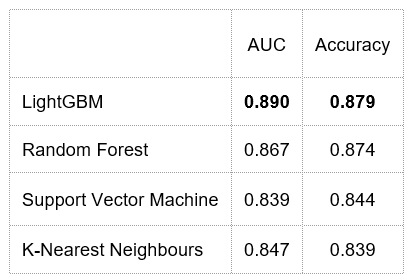

The table above demonstrates that with the update of the input the values of metrics for all algorithms improved with the AUC of SVM as a surprising exception (decrease from 0.842 to 0.839). LightGBM still shows the best results, hence it becomes our final choice for the label-inferring model. 

In [ ]:
#@title  { form-width: "1%" }
#@title 

#@title  { form-width: "1%" }
#@title 
import random

# function that produces indices for specific split
def house_split_indices(df, cv_index, train_fraction, verbose):
    train_houses = random.sample(cv_index, round(len(cv_index)*train_fraction))
    test_houses = list(set(cv_index) - set(train_houses))
    if verbose:
        print(f"Households in the training data are {train_houses}")
        print(f"Households in the test data are {test_houses}")
    train_ix = df[df.cv_index.isin(train_houses)].index
    test_ix = df[df.cv_index.isin(test_houses)].index
    return train_ix, test_ix

cv_index = list(dataset['cv_index'].unique())

In [ ]:
#@title  { form-width: "1%" }
# cell should be rerun until you get both houses from SMART in the test set 

train_ix, test_ix = house_split_indices(dataset, cv_index, 0.75, verbose=1)

AUC for LightGBM: 0.9274430946556657
AUC for random forest: 0.907313736058709
AUC for SVM: 0.9119366474563623
AUC for KNN: 0.9049297234545379


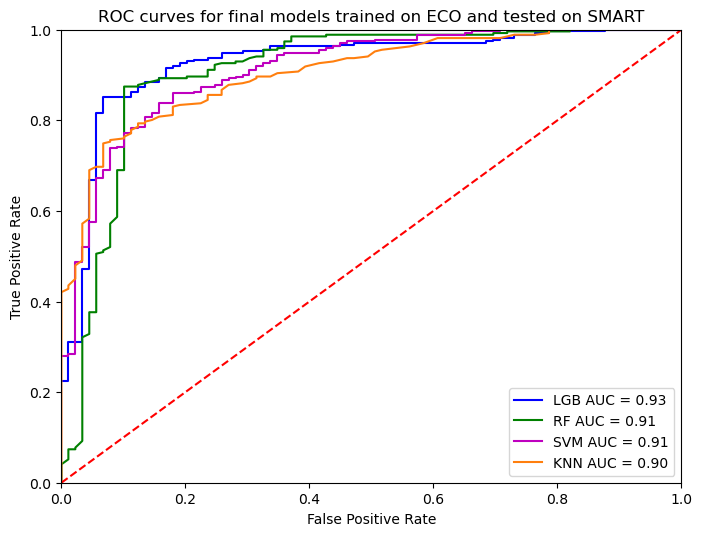

In [68]:
#@title Code to plot the chart { form-width: "10%" }
# plotting AUC for RF, LightGBM, KNN, and SVM models

import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6), dpi=100).clf()
plt.title('ROC curves for final models trained on ECO and tested on SMART')
lightgbm_infer.fit(
        X_fin[train_ix], y[train_ix]
    )
predictions = lightgbm_infer.predict_proba(X_fin[test_ix])[:,1]
fpr, tpr, threshold = metrics.roc_curve(y[test_ix], predictions)
roc_auc = metrics.auc(fpr, tpr)
print("AUC for LightGBM: {}".format(metrics.roc_auc_score(y[test_ix], predictions)))
plt.plot(fpr, tpr, 'b', label = 'LGB AUC = %0.2f' % roc_auc)

rf_infer.fit(
        X_fin[train_ix], y[train_ix]
    )
predictions = rf_infer.predict_proba(X_fin[test_ix])[:,1]
fpr, tpr, threshold = metrics.roc_curve(y[test_ix], predictions)
roc_auc = metrics.auc(fpr, tpr)
print("AUC for random forest: {}".format(metrics.roc_auc_score(y[test_ix], predictions)))
plt.plot(fpr, tpr, 'g', label = 'RF AUC = %0.2f' % roc_auc)

svm_infer.fit(
    X_fin[train_ix], y[train_ix]
)
predictions = svm_infer.predict_proba(X_fin[test_ix])[:,1]
fpr, tpr, threshold = metrics.roc_curve(y[test_ix], predictions)
roc_auc = metrics.auc(fpr, tpr)
print("AUC for SVM: {}".format(metrics.roc_auc_score(y[test_ix], predictions)))
plt.plot(fpr, tpr, 'm', label = 'SVM AUC = %0.2f' % roc_auc)

knn_infer.fit(
    X_fin[train_ix], y[train_ix]
)
predictions = knn_infer.predict_proba(X_fin[test_ix])[:,1]
fpr, tpr, threshold = metrics.roc_curve(y[test_ix], predictions)
roc_auc = metrics.auc(fpr, tpr)
print("AUC for KNN: {}".format(metrics.roc_auc_score(y[test_ix], predictions)))
plt.plot(fpr, tpr, 'tab:orange', label = 'KNN AUC = %0.2f' % roc_auc)
    
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

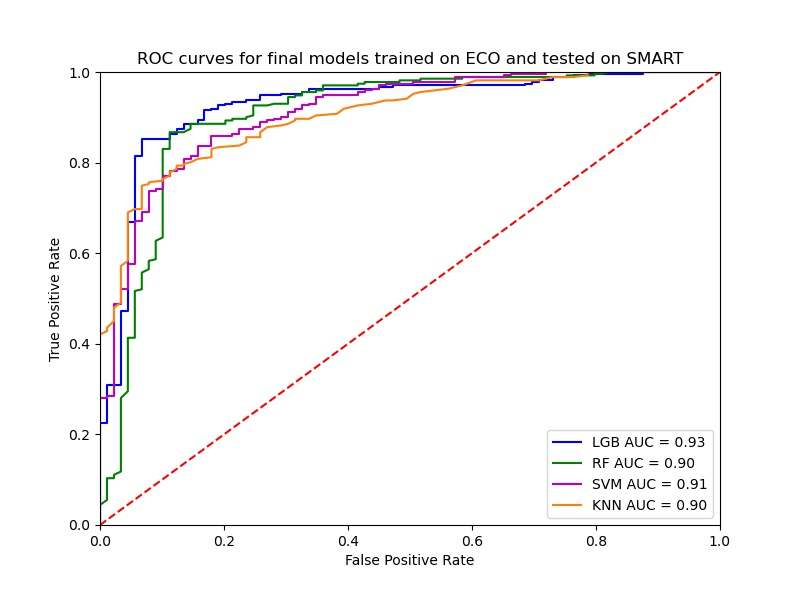

As for the ROC curves and the AUC values calculated for the split based on the data source, we see that the performance did not improve in general. However, now LightGBM and random forest have the higher values of AUC (0.93 against 0.91  and 0.90 against 0.88, respectively) while the AUC of SVM and KNN dropped. Now LightGBM has the highest AUC on the split and performs better given higher thresholds than other algorithms. It is possible that our genetic algorithm produces the features that is more favourable for LightGBM than for other algorithms as LightGBM was used in the evolutionary process.

## 2.3. Future occupancy prediction


### 2.3.1. Aggregating new data and inferring the labels

With the finalized label-inferring model, we can get the values of the target variable for unlabelled data and use this data to train the future occupancy predictor. We choose the REFIT dataset for this purpose since it provides large amount of data which is still feasible to process within the scope of our project.

REFIT dataset contains the values of electricity consumption measured at 8 second intervals for 20 households in Loughborough, the UK from October 2013 to June 2015. The considered time period and the number of households included by far exceeds SMART*, ECO, and DRED combined. 

Before we can apply the label-inferring model, REFIT should be brought to the proper format: cleaned, aggregated and updated with the necessary features.

In [ ]:
for i in range(1, 22):
    if i==14:
        continue
    else:

        df = pd.read_csv(f"REFIT/CLEAN_House{i}.csv")

        #formatting date and time
        df['datetime'] = list(map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'), df['Time']))
        df['hour'] = list(map(lambda x: x.hour, df['datetime']))       
        df['date'] = list(map(lambda x: x.date(), df['datetime']))

        df.rename(columns={'Aggregate':'power_usage'}, inplace=True)

        # filling NAs with hourly means
        hour_means = df.groupby(by=['date','hour']).mean()["power_usage"]
        df = df.merge(hour_means, how='left', on=['date','hour'])
        df['power_usage_x'] = df['power_usage_x'].fillna(df['power_usage_y'])
        df.drop('power_usage_y', axis = 1, inplace=True)
        df.rename({'power_usage_x':'power_usage'}, axis = 1, inplace=True)

        del hour_means

        # aggregation 
        df_hl = agg_by_hour(df, index_agg=['date', 'hour'], index_scale=['home'], occupancy=False)
        df_hl['home'] = i
        
        # concatenation
        if i==1:
            refit = df_hl
        else:
            refit = refit.append(df_hl, ignore_index=True)

        del df_hl
        del df

refit['dataset'] = 'REFIT'

dataset_refit, _, select_values_refit = get_baseline_features_and_data(refit, labelled=False)

The programs are also fitted to REFIT data to unable their execution.

In [ ]:
gp_refit = []

for feature in opt_set_infer:
    program_refit = _Program(
                 function_set = ['mean','range','sd',
                                 'sad','min','max',
                                 'sum','ratio','add',
                                 'greater','lesser'],
                 arities = {
                            'ratio':2,
                            'mean':1, 
                            'range':1,
                            'sd':1,
                            'sad':1,
                            'min':1,
                            'max':1,
                            'sum':1,
                            'add':2,
                            'greater':2,
                            'lesser':2
                },
                 df = dataset_refit,
                 select_values = select_values_refit,
                 init_depth = (1,5),
                 init_method = 'half and half',
                 p_point_replace = 0.05,
                 parsimony_coefficient = 0.0005,
                 n_features = 1,
                 first_gen=0,
                 random_state = np.random.RandomState(29029),
                 feature_names=['total_usage'], program=feature
                 )
    
    gp_refit.append(program_refit)

Now we can form the input to make predictions by our LightGBM classifier.

In [ ]:
# baseline input
X_refit = dataset_refit[baseline_features].values
# adding the genetically engineered features
for program in gp_refit:
    X_refit = np.append(X_refit,
                  np.reshape(program.execute(), (-1, 1)), axis=1)
# removing some baseline features
X_refit = X_refit[:,[11, 12, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]] 

Finally, we fit the model to the entire dataset with labels and make predictions on the REFIT.

In [ ]:
lightgbm_infer.fit(X_upd, y)
# saving the fitted model
joblib.dump(lightgbm_infer, 'lightgbm_infer.pkl')

dataset_refit['occupied_pred'] = lightgbm_infer.predict(X_refit)

dataset_refit.to_csv('refit_df.csv')

Now we have the predicted occupancy state corresponding to each of 212,763 average hourly values of energy consumption derived from REFIT. We understand that these predicted values almost surely digress to some extent from the ground truth. However, we assume that our dataset has now sufficient number of correct labels so that the final predictive model produces meaningful results. Small fraction of false labels may be relatively harmless to the model and can be compared to the inaccurate part of artificial data which is extensively used in ML modelling these days.

As the simpliest sanity check of the results of the label-inferring process, we calculate the estimated share of the hours when the household is occupied for REFIT dataset.



In [69]:
#@title Importing the data to skip the previous steps
#@title  { form-width: "1%" }
# here you can upload the dataset with predictions
dataset_refit = pd.read_csv('refit_df.csv')

In [70]:
# share of the hour when the house from REFIT on average is occupied
dataset_refit['occupied_pred'].mean()

0.8357938175340637

We get that the house from REFIT dataset is estimated to be occupied 83.6% of the hours  on average. This may seem like a lot but not in comparison with the datasets containing ground truth data on occupancy.

In [71]:
# share of the hour when the house from SMART on average is occupied
labelled_data[labelled_data['dataset']=='SMART']['occupied'].mean()

0.7757936507936508

In [72]:
# share of the hour when the house from ECO on average is occupied
labelled_data[labelled_data['dataset']=='ECO']['occupied'].mean()

0.7964226633581473

The average share of hours when a house is occupied for SMART and ECO are 77.6% and 79.6%, respectively. All these values are relatively close to each other, this allows us to continue with the idea that our predictions are close to the truth.

### 2.3.2. Development of the future occupancy predictor

***Input structure***

Future occupancy predictor that has smart meter readings as an input can be designed in a similar way to our label-inferring model. The key difference is that now at each hour the model should make 24 different predictions for 24 following hours. In other words, all information known up to the specific hour should be transformed into 24 different data points, from which the predictor would produce 24 different results (predictions). This also means that the probability of occupancy for each hour is predicted multiple times (24 times in most of the cases). For example, by the end of hour 0 of the specific day the model predicts the probabilities of occupancy for the next 24 hours from hour 1 this day to hour 0 of the following day, while at hour 1 the predictions are made for the period from hour 2 this day to hour 1 of the next day. Consequently, at both hours, 0 and 1, the predictions are made for the period from hour 2 to hour of the following day. To simplify the understanding of the following descriptions, we introduce now 3 quasi-definitions:

**Hour of prediction** is, shortly, the hour when prediction is made (or to be precise, by the end of which the prediction is made since we consider only full information of the hour as an input). At each hour of prediction, we have 24 predictions.

**Hour for prediction** is, shortly, the hour for which the prediction is made. Up to 24 predicted probabilities correspond to each hour for prediction.

**Lag of prediction** (or simply lag) is the difference in hours between the hour for prediction and the hour of prediction. In our model this value is presented within the interval between 0 and 23 inclusive. It shows how far in time the point for which the prediction is made from the one when this prediction is made. If lag is 0, it means that prediction is made for the current hour at any of its moments using the full information about past hours. 

To set up the proper input, we replicate our initial dataset 24 times, create the features that accounts for lag and new time index which accounts for the hour of prediction. Our former time index now accounts for the hour for prediction.

In [ ]:
#@title Importing the data to skip the previous steps { form-width: "1%" }
# with this cell you can upload preprocessed dataset woth inferred labels
dataset_refit = pd.read_csv('refit_df.csv')

In [73]:
#@title  { form-width: "1%" }
# replicating the initial dataset
refit_fut = dataset_refit.append([dataset_refit]*23,ignore_index=True)

# creating 'lag' variable
refit_fut['lag'] = refit_fut.index // (refit_fut.shape[0]/24)

from datetime import datetime, timedelta
refit_fut['datehour'] = refit_fut['datehour'].values.astype('datetime64')
# creating the variable for hour of prediction which we get from the former time index and lag
refit_fut['time_of_prediction'] = list(map(lambda x, y: x - timedelta(hours = y), 
                                           refit_fut['datehour'], refit_fut['lag'])) 

# removing unnecessary features
ftrs = ['dataset','home','date','datehour',
        'time_of_prediction','lag','month','weekday','weekend','hour','night'] + [
    'usage_' + str(i) for i in range(-24,0)] + ['occupied_pred','cv_index']
refit_fut = refit_fut[ftrs]

***Baseline features***

The following steps of the development of our predictor are analogous to the ones of the development of the label-inferring model:

* Engineering the baseling features
* Tuning the hyperparameters of the baseline models
* Comparing the performance of the baseline models and choosing the best one
* Developing new features with genetic algorithm 
* Random search for the optimal set of the features
* Comparing the performance of the final models and choosing the best one

Some difference is present in the set of the baseline features. The baseline features for the future occupancy predictor include:

1. **Time-related features**

Time-related features include hour of the day, weekend dummy, and month. They are derived for the timestamps that account for hour of prediction.

2. **Hourly power consumption 24 hours ago**

This feature is described in Section 2.2.b. The value is hourly electricity consumption 24 hours before the hour of prediction. Since the lag is never greater than 23, we have this information for any of the hours for which the model should make predictions. Unlike for the label-inferring model, we cannot additionally use here the values of hourly power consumption 24 hours later since in this case it would cause the data leakage.



In [74]:
# creating a separate feature
refit_fut['usage_day_ago'] = refit_fut['usage_-24']

3. **Past values of hourly power consumption**

We again use the window of hourly values as an input to provide the model with context. However, as our task now is prediction, we are using only the information known up to the hour of prediction, namely, the 10 past houly values of power consumption before the hour of prediction. While the power consumption 24 hours ago we have for the hour for prediction. This set of features is used as it is to make all 24 predictions at the specific hour. 

In [76]:
# putting the values to the right positions in the dataset

refit_fut.sort_values(by = ['lag','home','date','hour',], ignore_index=True, inplace=True)
past_usage = ['usage_' + str(i) for i in range(-24,0)]
past_values = refit_fut[refit_fut['lag'] == 0][['time_of_prediction','home'] + past_usage]
refit_fut.drop(past_usage, axis=1, inplace=True)
refit_fut = refit_fut.merge(past_values, how='left', on=['time_of_prediction','home'])
del past_values

4. **Lag**

Lag should work in combination with the past values of hourly power consumption. While the latter part of the input remains the same for 24 different data points, lag should work as an implicit indicator to the model that this windows of values bears different sense for 24 data points with the same hour of prediction.

In [77]:
# finalizaing the dataset
refit_fut.dropna(inplace=True)
refit_fut.reset_index(inplace=True)

refit_fut.sort_values(by = ['home','time_of_prediction','lag',], ignore_index=True, inplace=True)

# auxilary dataset for the functioning of the genetic algorithm
past_usage = ['usage_' + str(i) for i in range(-24,0)]
select_values_fut = refit_fut[past_usage].values.T

# current list of the baseline features
baseline_features_fut = ['lag',
'month', 'weekend', 'hour', 'usage_day_ago', 
'usage_-10', 'usage_-9', 'usage_-8', 'usage_-7', 'usage_-6',
 'usage_-5', 'usage_-4', 'usage_-3', 'usage_-2', 'usage_-1']

 # input dataset and target

X_fut = refit_fut[baseline_features_fut].values
y_fut = refit_fut['occupied_pred'].values

Finally, after all transformations of the data, we end up with 5,022,617 15-dimensional data points.

***Further steps***

Once again we tune the hyperparameters of the models where necessary.

In [ ]:
import lightgbm
dtrain_fut = lightgbm.Dataset(X_fut, label=y_fut)

# tuning hyperparameters of LightGBM with the use of Optuna framework
# takes extremely long time to run

from sklearn.model_selection import TimeSeriesSplit, train_test_split
import optuna.integration.lightgbm as lgb


params = {
    "objective": "binary",
    "metric": "auc",
    "verbosity": -1,
    "boosting_type": "gbdt",
}


tuner_fut = lgb.LightGBMTunerCV(
    params, dtrain_fut, verbose_eval=100, early_stopping_rounds=100, folds=KFold(n_splits=4)
)
tuner_fut.run()

fut_best_params = tuner_fut.best_params

fut_best_params['colsample_bytree'] = fut_best_params.pop('feature_fraction')
fut_best_params['reg_alpha'] = fut_best_params.pop('lambda_l1')
fut_best_params['reg_lambda'] = fut_best_params.pop('lambda_l2')
fut_best_params['subsample_freq'] = fut_best_params.pop('bagging_freq')
fut_best_params['subsample'] = fut_best_params.pop('bagging_fraction')

lightgbm_fut = lightgbm.LGBMClassifier(**fut_best_params)

In [ ]:
# tuning hyperparameters of RF
# takes extremely long time to run

import optuna
from sklearn import linear_model
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection


def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", ["LogReg", "RandomForest"])
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'LogReg':
        logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
        classifier_obj = linear_model.LogisticRegression(C=logreg_c)
    else:
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=rf_n_estimators
        )


    score = model_selection.cross_val_score(classifier_obj, X_fut, y_fut,
                                            n_jobs=-1, cv=KFold(n_splits=4))
    accuracy = score.mean()
    return accuracy

study_fut = optuna.create_study(direction="maximize")
study_fut.optimize(objective, n_trials=100)

rf_fut = ensemble.RandomForestClassifier(
    max_depth=study.best_params["rf_max_depth"], 
    n_estimators=study.best_params["rf_n_estimators"]
    )

In [ ]:
# tuning k parameter of KNN - extremely long time to run

from sklearn import neighbors
aucs = {}
for i in range(50,150):
    
    model = neighbors.KNeighborsClassifier(n_neighbors=i)
    print(f"Values of AUROC for KNN with {i} neighbours")
    aucs[i] = cv_acc_auc(model, X_fut, y_fut, refit_fut)

knn_fut = neighbors.KNeighborsClassifier(n_neighbors=max(aucs, key = aucs.get))

In [78]:
#@title Importing the data to skip the previous steps { form-width: "1%" }
# setting the pretrained hyperparameters for the models

# hyperparameters of LGB
fut_best_params = {'objective': 'binary',
 'metric': 'auc',
 'verbosity': -1,
 'boosting_type': 'gbdt',
 'feature_pre_filter': False,
 'lambda_l1': 6.622496593362978e-06,
 'lambda_l2': 0.12930416064960798,
 'num_leaves': 256,
 'feature_fraction': 0.9799999999999999,
 'bagging_fraction': 0.9836264926563466,
 'bagging_freq': 3,
 'min_child_samples': 25}

fut_best_params['colsample_bytree'] = fut_best_params.pop('feature_fraction')
fut_best_params['reg_alpha'] = fut_best_params.pop('lambda_l1')
fut_best_params['reg_lambda'] = fut_best_params.pop('lambda_l2')
fut_best_params['subsample_freq'] = fut_best_params.pop('bagging_freq')
fut_best_params['subsample'] = fut_best_params.pop('bagging_fraction')

import lightgbm
lightgbm_fut = lightgbm.LGBMClassifier(**fut_best_params)

# hyperparameters of RF
from sklearn import ensemble
rf_fut = ensemble.RandomForestClassifier(max_depth=32, n_estimators=982)

# hyperparameter of KNN
from sklearn import neighbors
knn_fut = neighbors.KNeighborsClassifier(n_neighbors=177)


Then we assess the performance of the algorithms with the average AUC value derived from the group k-fold cross-validation.

In [79]:
# performance of LightGBM
cv_acc_auc(lightgbm_fut, X_fut, y_fut, refit_fut)

[0.8711562494603198, 0.8372645879720427, 0.7610826241262298, 0.8692085089285397]
[0.8590120930555183, 0.85511442829359, 0.8345177000164922, 0.8807925737168961]
Cross-validated AUC of the model is 0.834677992621783
Cross-validated accuracy of the model is 0.8573591987706242


(0.834677992621783, 0.8573591987706242)

In [ ]:
# performance of RF - we were not able to obtain one 
cv_acc_auc(rf_fut, X_fut, y_fut, refit_fut)

In [ ]:
# performance of SVM - we were not able to obtain one 

from sklearn.svm import SVC
svm_fut = SVC(kernel='rbf',probability=True)

cv_acc_auc(svm_fut, X_fut, y_fut, refit_fut)

In [ ]:
# performance of KNN - we were not able to obtain one 
cv_acc_auc(knn_fut, X_fut, y_fut, refit_fut)

Since our dataset is now considerably large, the time of model training and of the algorithm run increased multiple times. Simple calculation of the average AUC for different models takes hours with one exception of LightGBM which still produces all result in the reasonable amount of time. As we are expecting LightGBM to show the best performance anyway (due to the results on the previous step and the common notion that gradient boosting usually performs better that other algorithms considered) and as we are facing the trade-off between the extensiveness of the model and its feasibility in terms of time, we decide thereafter to use LightGBM in our genetic algorithm without the review of other models' performance. 

The comparison of performance for future occupancy predictors will be still included in the pipeline of our agent. Agent is supposed to handle smaller volume of the data, since the data is coming from one household, so we expect this operation to take less time. Here we need the model to develop the set of features for the future occupancy predictor based on the large, diverse dataset like REFIT.

The value of average AUC for LightGBM is 0.835 (Accuracy score is 0.857), which is already impressive and we are expecting some increase from updating the input after the application of the genetic algorithm.

Genetic algorithms operates in the same way as for the label-inferring model, the only difference is that now the function *Select()* is able to choose the narrower window of values (past values of electriity consumption only.

In [ ]:
# genetic algorithm for predictor - takes several days to run
gp_features_fut = evolution(
    X=refit_fut['usage_-1'].values, y=refit_fut['occupied_pred'].values, 
    df=refit_fut, select_values=select_values_fut,
    baseline_features=baseline_features_fut, 
    model=lightgbm_fut,
    train_fraction = 0.75,
    population_size=100,
    hall_of_fame=100,
    generations=21,
    tournament_size=5,
    init_depth=(3, 3),
    init_method='half and half',
    feature_names=['usage_-1'],
    p_crossover=0.8,
    p_subtree_mutation=0.05,
    p_hoist_mutation=0,
    p_point_mutation=0.1,
    p_point_replace=0.33,
    parsimony_coefficient=0.0001,
    random_state=1117,
    n_jobs=-1,
    warm_start=True, low_memory=False,
    verbose=1, programs=None, future=True)

import joblib
joblib.dump(gp_features_fut, 'gp_features_fut.pkl')

As the algorithm became very time-consuming, we did manage to run only 21 generations of programs. The ransom search of the optimal set takes much longer as well, so we got through 100 iterations only.

In [ ]:
#@title Importing the data to skip the previous steps { form-width: "1%" }
# running this cell you can upload the programs developed by us with the algorithm
# and assert their structure is correct and fits the data
import joblib
features = joblib.load('gp_features_select.pkl')

gp_features_fut = []

for feature in features:
    future_program = _Program(
                 function_set = ['mean','range','sd',
                                 'sad','min','max',
                                 'sum','ratio','add',
                                 'greater','lesser'],
                 arities = {
                            'ratio':2,
                            'mean':1, 
                            'range':1,
                            'sd':1,
                            'sad':1,
                            'min':1,
                            'max':1,
                            'sum':1,
                            'add':2,
                            'greater':2,
                            'lesser':2
                },
                 df = refit_fut,
                 select_values = select_values_fut,
                 init_depth = (1,5),
                 init_method = 'half and half',
                 p_point_replace = 0.05,
                 parsimony_coefficient = 0.0005,
                 n_features = 1,
                 first_gen=0,
                 random_state = np.random.RandomState(29029),
                 feature_names=['usage_-1'], program=feature
                 )
    
    gp_features_fut.append(future_program)

In [ ]:
# random search fot the optimal set of the features for future occuapncy predictor
# also takes days to run
search_params_fut = {
    "X":X_fut,
    'y':y_fut,
    'model':lightgbm_fut,
    'df':refit_fut
}

opt_set_fut = feature_set_search(gp_features_fut, max_set_size=10, 
                                 n_iterations = 100, seed=256, 
                                 **search_params_fut)

In [87]:
# prints the formulas of the chosen features
for program in opt_set_fut:
    print(program.__str__())

ratio(max(select(-21,-6,'usage_-1')), sd(select(-12,-7,'usage_-1')))
add(sad(select(-24,-13,'usage_-1')), range(select(-21,-2,'usage_-1')))
add(sad(select(-21,-10,'usage_-1')), sad(select(-23,-13,'usage_-1')))
ratio(sum(select(-21,-15,'usage_-1')), sad(select(-13,-4,'usage_-1')))
ratio(mean(select(-19,-11,'usage_-1')), sad(select(-22,-8,'usage_-1')))


In [85]:
#@title Importing the data to skip the previous steps { form-width: "1%" }
# chooses the presearched features from the list
choice_fut = [4,18,2,1,17]
opt_set_fut = [x for x in gp_features_fut if gp_features_fut.index(x) in choice_fut]


In [89]:
# execute the chosen programs and add the features to the input
X_fut_upd = X_fut.copy()
for feature in opt_set_fut:
    X_fut_upd = np.append(X_fut_upd,
                  np.reshape(feature.execute(), (-1, 1)), axis=1)
    
cv_acc_auc(lightgbm_fut, X_fut_upd, y_fut, refit_fut)


The program being estimated is ratio(max(select(-21,-6,'usage_-1')), sd(select(-12,-7,'usage_-1')))


C:\Users\Makar\anaconda3\envs\apa\lib\gp_features\_program.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  output = np.array(list(map(lambda x, y: x / y, a1, a2)))



The program being estimated is add(sad(select(-24,-13,'usage_-1')), range(select(-21,-2,'usage_-1')))

The program being estimated is add(sad(select(-21,-10,'usage_-1')), sad(select(-23,-13,'usage_-1')))

The program being estimated is ratio(sum(select(-21,-15,'usage_-1')), sad(select(-13,-4,'usage_-1')))

The program being estimated is ratio(mean(select(-19,-11,'usage_-1')), sad(select(-22,-8,'usage_-1')))


NameError: name 'cv_auc' is not defined

In [90]:
cv_acc_auc(lightgbm_fut, X_fut_upd, y_fut, refit_fut)

[0.8858091093293347, 0.8530347519851177, 0.7781162533115226, 0.8731259544564179]
[0.8658618292342641, 0.8616394916589726, 0.8381872156307298, 0.8818138992767636]
Cross-validated AUC of the model is 0.8475215172705982
Cross-validated accuracy of the model is 0.8618756089501824


(0.8475215172705982, 0.8618756089501824)

We come up with a set of 5 features, addition of which to the model increases its average AUC up to 0.848 (Accuracy score is 0.862). This concludes our path to building the fully-trained future occupancy predictor.

***Performance of the future occupancy predictor for different lags***

We expect that our predictor gives less accurate predictions for the hours that are more distant from the current hour. However, we are not sure about the form of this relation. We might as well assume that the predictions get worse at first but then improve as the lag approached 24 hours, since there is some sense in thinking that the pattern of power consumption 23 hours later may be similar to the one 1 hour ago due to the cyclical nature of daily routines. If such patterns are similar then the most recent data which is the most reliable could possibly help us to make predictions for the most distant hours. 

To observe this relation, we obtain the AUC value of predictions on the test set for each of lags separately.

In [91]:
cv_index_fut = list((refit_fut['cv_index'].unique()))
# making the split in the data
train_ix_fut, test_ix_fut = house_split_indices(refit_fut, cv_index_fut, 
                                                0.75, verbose=1)
# fitting the model
lightgbm_fut.fit(
        X_fut_upd[train_ix_fut], y_fut[train_ix_fut]
    )

# making predictions for the truncated dataset
lag_check = refit_fut.iloc[test_ix_fut, :]
lag_check['occ_fut_pred'] = lightgbm_fut.predict_proba(X_fut_upd[test_ix_fut])[:,1]

lags = list(range(24))
aucs_lags = []

# calculating AUC for subsets with different lags
for i in range(24):
    df = lag_check.query(f"lag == {i}")
    auc = metrics.roc_auc_score(df['occupied_pred'], df['occ_fut_pred'])
    aucs_lags.append(auc)
    
lags_aucs = pd.DataFrame(list(zip(lags, aucs_lags)),
               columns =['lag', 'AUC'])
# print out the results
lags_aucs

Households in the training data are ["('REFIT', 16)", "('REFIT', 21)", "('REFIT', 8)", "('REFIT', 17)", "('REFIT', 1)", "('REFIT', 5)", "('REFIT', 19)", "('REFIT', 12)", "('REFIT', 3)", "('REFIT', 2)", "('REFIT', 4)", "('REFIT', 7)", "('REFIT', 9)", "('REFIT', 18)", "('REFIT', 10)"]
Households in the test data are ["('REFIT', 15)", "('REFIT', 11)", "('REFIT', 20)", "('REFIT', 13)", "('REFIT', 6)"]


C:\Users\Makar\anaconda3\envs\apa\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


lag       AUC
0     0  0.920611
1     1  0.886984
2     2  0.863063
3     3  0.847019
4     4  0.834778
5     5  0.823951
6     6  0.817020
7     7  0.811875
8     8  0.807683
9     9  0.803662
10   10  0.800372
11   11  0.795963
12   12  0.794447
13   13  0.793345
14   14  0.791640
15   15  0.790328
16   16  0.789259
17   17  0.788874
18   18  0.789068
19   19  0.789321
20   20  0.789504
21   21  0.790929
22   22  0.789709
23   23  0.785685

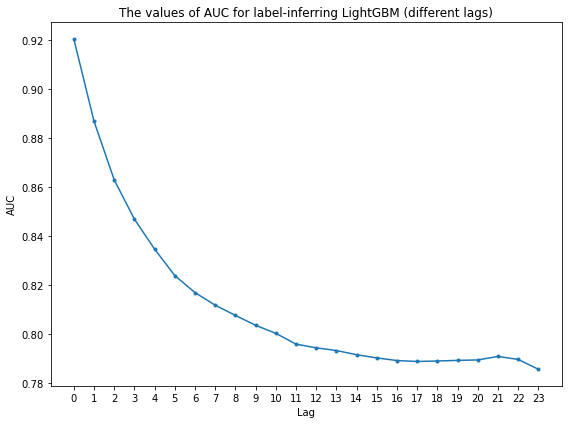

In [92]:
#@title Code to plot the chart { form-width: "1%" }
# plot the lags against the AUC

fig, ax = plt.subplots()
lags_aucs['AUC'].plot(ax=ax, marker='.', figsize=(8, 6))
ax.set_title("The values of AUC for label-inferring LightGBM (different lags)")
ax.set_ylabel("AUC")
ax.set_xlabel("Lag")
ax.set_xticks(np.arange(24))
fig.tight_layout()
plt.show()

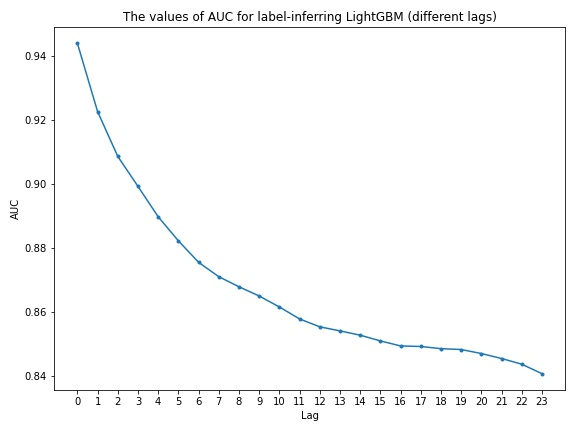

From the line plot it can be concluded that the quality of prefictions drops with each new lag in the increasing order - the further ahead is the hour for which the prediction is made, the less accurate is the prediction. For each new lag before 19, the decrease in the AUC gets smaller. The recurrence in electricity conumption patterns seems not to play a big role for predictions, probably because it is inferior to the recurrence of daily hours. 

In [ ]:
lightgbm_fut.fit(X_fut_upd, y_fut)
joblib.dump(lightgbm_fut, 'lightgbm_fut.pkl')

# 3. Feature importance and explainability of the models

***Feature importance***

We assess the importance of the features for our models using various approaches. First thing to mention is that the measure of fitness used in our genetic algorithm, uplift in the AUC of the model, when the features is added to the input, is also can be interpreted as the measure of feature importance. However, simple addition of the feature to the input and the calculation of the resulting performance uplift may not be the most accurate way to estimate the importance of the feature. Thus, we use two other methods. For the label-inferring model, we apply MDI (mean decrease in impurity) approach to the fit of random forest and permutation approach to the fit of LightGBM. For the future occupancy predictor, we apply permutation approach only since we do not have trained random forest to predict future occupancy and MDI makes sense only given parallel estimators.

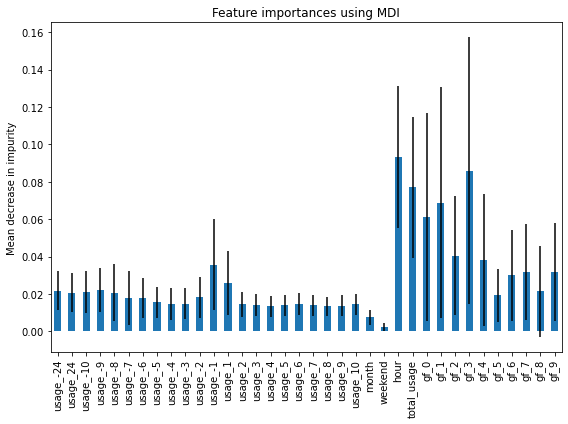

In [93]:
# fit RF to the whole dataset
rf_infer.fit(X_upd, y)

# derive the MDI-based importance and the values of standard deviation
importances = rf_infer.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf_infer.estimators_], axis=0)

# feature names and numbered genetic features
feature_names = baseline_features + [f"gf_{i}" for i in range(10)]

import matplotlib.pyplot as plt


forest_importances = pd.Series(importances, index=feature_names)
# plot the importances with SDs
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize=(8, 6))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


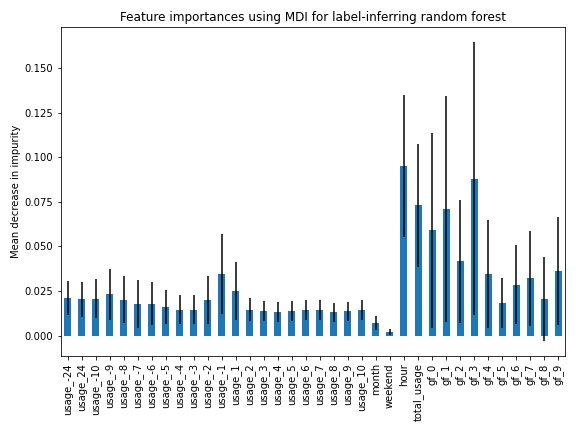

In [94]:
# prints out the values of MDI importance for features
forest_importances

usage_-24      0.021695
usage_24       0.020616
usage_-10      0.020932
usage_-9       0.022127
usage_-8       0.020604
usage_-7       0.017907
usage_-6       0.017897
usage_-5       0.015427
usage_-4       0.014702
usage_-3       0.014705
usage_-2       0.018194
usage_-1       0.035581
usage_1        0.025620
usage_2        0.014344
usage_3        0.014128
usage_4        0.013320
usage_5        0.013825
usage_6        0.014467
usage_7        0.013892
usage_8        0.013440
usage_9        0.013689
usage_10       0.014426
month          0.007400
weekend        0.002284
hour           0.093390
total_usage    0.077019
gf_0           0.061030
gf_1           0.068719
gf_2           0.040517
gf_3           0.085834
gf_4           0.038257
gf_5           0.019196
gf_6           0.029980
gf_7           0.031742
gf_8           0.021300
gf_9           0.031791
dtype: float64

The picture above shows that, among the set of different smart meter readings aggregations, the most significant decrease in impurity (MDI of 0.095) present in the model occurs with the feature that account for the hour of the day. This is not surprising since obviously occupancy patterns are tightly connected to the day cicle. 

The second most important feature based on MDI is *gf_3* (0.088), which is an alias for a feature with the formula *Greater(SAD(Select(*-8,2, x*)),* x*)*, where x is the total power consumption over the current hour. This aggregation captures the variance of comsumption values in the vicinity of the current moment (sum absolute delta fpr the period from 8 hours ago to 2 hours later), probably this is the reason why the feature is beneficial to the model. However, we also see that MDI of this feature differs a lot from estimator to estimator (the highest standard deviation). 

*gf_0* and *gf_1* also show high MDI (0.059 and 0.071, respectively). The formulas of this features are *Lesser(Range(Select(*-4,4, x*)), SAD(Select(*13,19, x*)))* and *Add(SAD(Select(*-2,1, x*)), SD(Select(*16,22, x*)))*. It is notable that all functions building up the formulas  capturing fluctuations and the specific levels like *Mean()*, *Max()*,*Min()*, or *Sum()*. Furthermore, the trees for both features have one branch with the function aggregating the information within the vicinity of the current hour and the second branch that contains the aggregation of the values in considerably distant future from the current hour (more than 10 hours later). Other genetically engineered features are not that important according to MDI approach but still result in higher decrease in impurity than almost all features with raw consumption values.

As for the raw consumption values included in the model input, total consumption over the current hour (*total_usage*) bears significant importance to the model, MDI value (0.072) greater than the two last mentioned genetic features. Importance of the features with the values of electricity consumption hour ago and hour later is comparable to the importance of weaker, not mentioned genetic features. Other features are barely important judging by MDI. 

As we see that a lot of features in the input bear little importance to the model but create plenty of sparsity in the data space, we decided to exclude a large number of features from the input of the label-inferring model (the weekend dummy and all of raw consumption values except for the current hour, hour ago, and hour later).

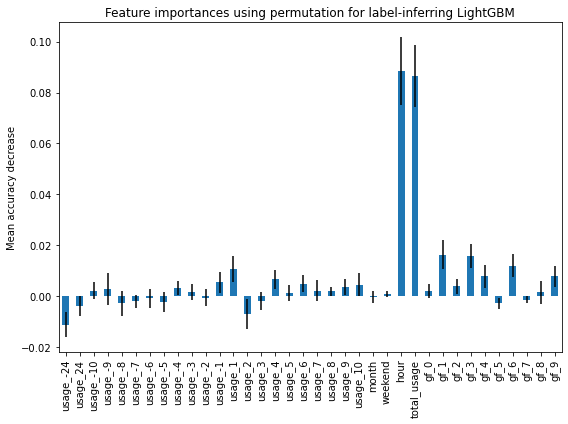

In [95]:
lightgbm_infer.fit(
        X_upd[train_ix], y[train_ix]
    )

from sklearn.inspection import permutation_importance

# estimating permutation-based performance
result = permutation_importance(
    lightgbm_infer, 
    X_upd[test_ix], y[test_ix], 
    n_repeats=10, random_state=42, n_jobs=2)


lgb_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
lgb_importances.plot.bar(yerr=result.importances_std, ax=ax, figsize=(8, 6))
ax.set_title("Feature importances using permutation for label-inferring LightGBM")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

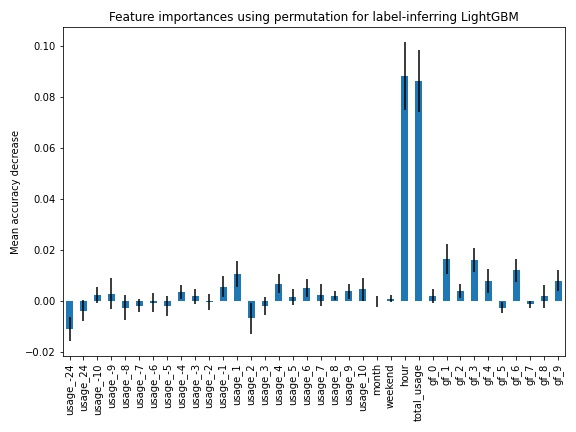

To ensure the consistency of the results, we demonstrate the feature importance for another algorithm, LightGBM, and with the use of another method, permutations. The results largely differ, but we still can see that most of the features that demonstrated performance with high MDI remain important within the context of permutations. By far the most important ones are hour of the day and the consumption of the energy within the current hour, also some discussed genetic features yield relatively high mean accuracy decrease when permuted. 

Now we can observe the permutation-based importance for the features in the input of the future occupancy predictor. 

In [ ]:
from numpy import inf
# removing infinite values produced by division
X_fut_upd[X_fut_upd == inf] = 0
X_fut_upd[X_fut_upd == -inf] = 0

feature_names_fut = baseline_features_fut + [f"gf_{i}" for i in range(5)]


lightgbm_fut.fit(
        X_fut_upd[train_ix_fut], y_fut[train_ix_fut]
    )

from sklearn.inspection import permutation_importance

# estimating permutation-based performance for future occupancy predictor
result = permutation_importance(
    lightgbm_fut, 
    X_fut_upd[test_ix_fut], y_fut[test_ix_fut], 
    n_repeats=10, random_state=43, n_jobs=2)


lgb_fut_importances = pd.Series(result.importances_mean, index=feature_names_fut)

fig, ax = plt.subplots()
lgb_fut_importances.plot.bar(yerr=result.importances_std, ax=ax, figsize=(8, 6))
ax.set_title("Feature importances using permutation for LightGBM predictor")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

**Note**: The results in the chart below are valid for the split in REFIT dataset such that houses 8, 9, 13, 19, 20 are in the test set.

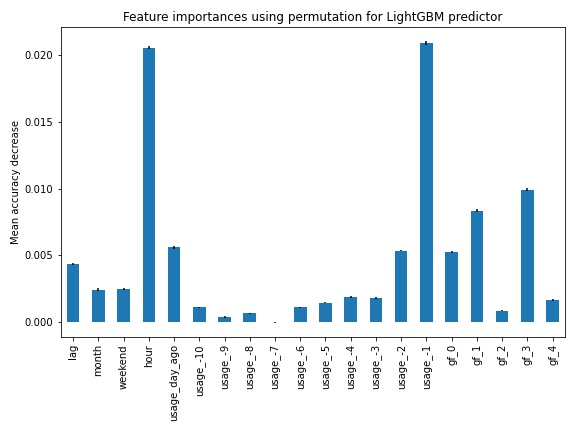

The chart above demonstrates that the hour of the day is one the most important feature for the predictor as well based on permutations. Permutation of the hourly power consumption one our ago also results in the comparable mean accuracy decrease (around 0.2). 

As for other features, there are 3 relatively important genetic features. The most prominent is *gp_3*, *Ratio(Sum(Select(*-21,-15, x*)), SAD(Select(*-13,-4, x*)))*, slighly less important is *gp_1*, *Add(SAD(Select(*-24,-13, x*)), Range(Select(*-21,-2, x*)))*, and even less important is *gp_0* with the formula *Ratio(Max(Select(*-21,-6, x*)), SD(Select(*-12,-7, x*)))*. 2 features with raw consumption values (2 hours ago and a day ago) yield the value of mean accuracy decrease compared to the one of *gp_0*. Now we see ratios among important genetic features (Although, the reason for this may be that the programs past through not so many generations). Expectedly, one term of both present ratios is the aggreagation that captues the level of the values (functions are *Sum()* and *Max()*), while the second term is the aggregation that captures the variance of the values (functions are *SAD()* and *Range()*). Thus the obtained aggregated values forming these features are normalized. 

Yet another interesting observation is the low importance of lag feature. In fact, this may raise a doubt about the design of our future predictor in general. 

***Explainability of the models with SHAP***

To take a closer look at how specifically the values of the features affect the predictions of our models, we apply tree SHAP algorithm and analyze the resulting SHAP values for some data points and our two models in use: label-inferring LightGBM and LightGBM predictor of the future occupancy. 

In [97]:
feature_names_fin = [feature_names[x] for x in [11, 12, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]]

X_test = pd.DataFrame(data = X_fin[test_ix], columns=feature_names_fin)

lightgbm_infer.fit(X_fin[train_ix], y[train_ix])

y_test = y[test_ix]
y_pred = lightgbm_infer.predict_proba(X_fin[test_ix])[:,1]

import shap
# deriving SHAP values for label-inferring model
explainer_infer = shap.TreeExplainer(model=lightgbm_infer,
                               data=None,
                               model_output='raw',
                               feature_perturbation='tree_path_dependent')

shap_values = explainer_infer.shap_values(X_fin[test_ix])

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


As we have SHAP values for the test set, we can now observe how various features contribute to the resulting specific predictions. To make it brief, we show here how SHAP explains 2 different value predicted by our label-inferring model.

In [98]:
# values of the features for observation 123 in the test set
X_test.iloc[123, :]

usage_-1      -0.461024
usage_1       -0.552926
month                 7
hour                  3
total_usage   -0.560435
gf_0           0.582024
gf_1           0.579973
gf_2           0.335347
gf_3            1.05104
gf_4            7.02068
gf_5           0.375487
gf_6             7.2214
gf_7           0.683177
gf_8           0.540662
gf_9          -0.336854
Name: 123, dtype: object

In [100]:
# raw prediction of the model is log-odds for specific data point
# here it is placed against mean log-odds over the training set (base value)
print(f'True value for 123-th observation: {y_test[123]}')
print(f'Probability of default for 123-th observation: {y_pred[123]}')
print(f'Raw model prediction (logit) for 123-th observation: {lightgbm_infer.predict(X_fin[test_ix], raw_score=True)[123]}')
print(f'Base value = mean logit (log-odds) over training data = {np.mean(lightgbm_infer.predict(X_fin[train_ix], raw_score=True))}'
     )

True value for 123-th observation: 1
Probability of default for 123-th observation: 0.9862969710205306
Raw model prediction (logit) for 123-th observation: 4.276340595113877
Base value = mean logit (log-odds) over training data = 2.781734703786375


In [101]:
# plotting the results for observation 123
shap.initjs()
shap.force_plot(explainer_infer.expected_value[1], shap_values[1][123,:], features=X_test.iloc[123, :], )

The first considered data point accounts for the hour 3 (from 03:00 to 04:00) of some July day. The probability estimated by model is 0.986 and the prediction is correct. Actually, we can tell without any predictor with a great deal of certainty that the house is likely to be occupied this late at night. The chart above shows how specific features contribute to the raw prediction score (log-odds). Red arrow pointing to the right means that the value of the feature increases the raw score which increases the possibility of prediction positive class, which is the occupied house in our case (positive class is predicted when the score is above the threshold of 0). As it could be expected, the hour of the day contributes to the increase of the score the most, while the energy consumption over the current hour and some aggregations with genetic features are misleading - they decrease the score, which is also expected since at night the power consumption is low which is at daytime a signal of vacancy. Seasonality captured by *month* variable does not play a significant role for making a prediction. 

In [102]:
# values of the features for observation 140 in the test set
X_test.iloc[140, :]

usage_-1       0.442267
usage_1        0.413411
month                 7
hour                 20
total_usage     0.29249
gf_0           0.269009
gf_1            1.47095
gf_2           0.338482
gf_3            1.62974
gf_4            2.81073
gf_5          -0.254522
gf_6             5.0115
gf_7           0.338482
gf_8           0.196563
gf_9          -0.410658
Name: 140, dtype: object

In [104]:
# true values and predicted scores
print(f'True value for 140-th observation: {y_test[140]}')
print(f'Probability of default for 140-th observation: {y_pred[140]}')
print(f'Raw model prediction (logit) for 123-th observation: {lightgbm_infer.predict(X_fin[test_ix], raw_score=True)[140]}')
print(f'Base value = mean logit (log-odds) over training data = {np.mean(lightgbm_infer.predict(X_fin[train_ix], raw_score=True))}'
     )

True value for 140-th observation: 1
Probability of default for 140-th observation: 0.9776731658412844
Raw model prediction (logit) for 123-th observation: 3.779386147372629
Base value = mean logit (log-odds) over training data = 2.781734703786375


In [105]:
shap.initjs()
shap.force_plot(explainer_infer.expected_value[1], shap_values[1][140,:], features=X_test.iloc[140, :], )

To consider the different context for the model, we explain the prediction for the same house 17 hours later, at hour 20. At this hour, the house was occupied as well and the model predicted it correctly having estimated a very high probability of 0.978. Here judging by the SHAP values on the chart above, the hour of the day decreases the score pointing toward negative class which is not correct, while the greatest contribution in the right direction is made by the total power consumption over the current hour which is high in the evening and thus a clear signal that the house is occupied, the energy consumption an hour ago contributed to the result greatly as well. Different aggregations derived as genetically engineered features provide considerable contribution to the predictions but in both directions. Besides, we see that month of the year also matters a little to the result, probably because the seasonality has influence on the power consumption volume. 

We repeat the operations for the future occupancy predictor. To make our analysis diverse, we consider slightly new context for two selected predictions.

In [ ]:
# setup
explainer_fut = shap.TreeExplainer(model=lightgbm_fut,
                               data=None,
                               model_output='raw',
                               feature_perturbation='tree_path_dependent')

shap_values_fut = explainer_fut.shap_values(X_fut_upd[test_ix_fut])

X_test_fut = pd.DataFrame(data = X_fut_upd[test_ix_fut], columns=feature_names_fut)

y_test_fut = y_fut[test_ix_fut]
y_pred_fut = lightgbm_fut.predict_proba(X_fut_upd[test_ix_fut])[:,1]

In [ ]:
# values of the features for observation 10,500 in the test set
X_test_fut.iloc[10500, :]

In [ ]:
# true values and predicted scores
print(f'True value for 10,500-th observation: {y_test_fut[10500]}')
print(f'Probability of default for 10,500-th observation: {y_pred_fut[10500]}')
print(f'Raw model prediction (logit) for 10,500-th observation: {lightgbm_fut.predict(X_fut_upd[test_ix_fut], raw_score=True)[10500]}')
print(f'Base value = mean logit (log-odds) over training data = {np.mean(lightgbm_fut.predict(X_fut_upd[train_ix_fut], raw_score=True))}'
     )

In [ ]:
# plotting the chart
shap.initjs()
shap.force_plot(explainer_fut.expected_value[1], shap_values_fut[1][10500,:], features=X_test_fut.iloc[10500, :], )

The chart above is related to the data point that represents the prediction for the current hour during the current hour, which is hour 15 on some November day. The house is not occupied and it is revealed correctly, although the level of certainty is not that high (predicted probability is 0.478). The greatest positive contribution to the prediction was made by the hour of the day and the low value total energy consumption last hour, we see also that the lag matters and moves the score to the right direction, while the power consumption day ago and some genetic features influence the result negatively. 

In [ ]:
# values of the features for observation 777,500 in the test set
X_test_fut.iloc[777500, :]

In [ ]:
# true values and predicted scores
print(f'True value for observation 777,500: {y_test_fut[777500]}')
print(f'Probability of default for observation 777,500: {y_pred_fut[777500]}')
print(f'Raw model prediction (logit) for observation 777,500: {lightgbm_fut.predict(X_fut_upd[test_ix_fut], raw_score=True)[777500]}')
print(f'Base value = mean logit (log-odds) over training data = {np.mean(lightgbm_fut.predict(X_fut_upd[train_ix_fut], raw_score=True))}'
     )

In [ ]:
# plotting the chart
shap.initjs()
shap.force_plot(explainer_fut.expected_value[1], shap_values_fut[1][777500,:], features=X_test_fut.iloc[777500, :], )

The last explanation that we present corresponds to the prediction made at hour 4 for the hour 18 on the weekend day in June. The predictor correctly determined that the house was occupied (estimated probability is 0.912). In this case the hour of the day influences the score in a wrong way, as well as the feature *usage_1*, which accounts for the consumption an hour before the hour of prediction - not very helpful given the high lag. Nonetheless, we see that here the correct output is produced with the great contribution from genetic features, which stresses their importance for the specific observations (probably, the predictions with high lags). 

The interactive chart below provides even better look into how the feature values contribute to prediction given different data points.

All in all, SHAP explanations clearly show us that the predictions of the models are generally driven by the information about time of the day, while the data about electricity consumption and occasionally some other features play rather supportive role and bring some updates to regular patterns. 



In [ ]:
# interactive chart for 100 first data points in the test set

shap.initjs()
shap.force_plot(explainer_fut.expected_value[1], shap_values_fut[1][:100,:], features=X_test_fut.iloc[:100, :])

# 4. Demonstration of the agent in action

Below, you can see the structure of our agent that is supposed to be part of a larger system for offering recommendations to home owners that can help them save energy. The input to the agent is supposed to be an unknown data set that has the correct structure. What happens first then depends on whether or not the new dataset comes with occupancy labels or not. If it does, great, the dataset is ready for the next step. If not, the agent uses our label-inferring model that generates occupancy labels for each hour based on the energy consumption. Next, genetic programming is applied, based on pre-selected features that have proven to perform well. In the final step, the best combination of features and model is chosen accoarding to its performance and the predicted probabilities for home occupation are issued.

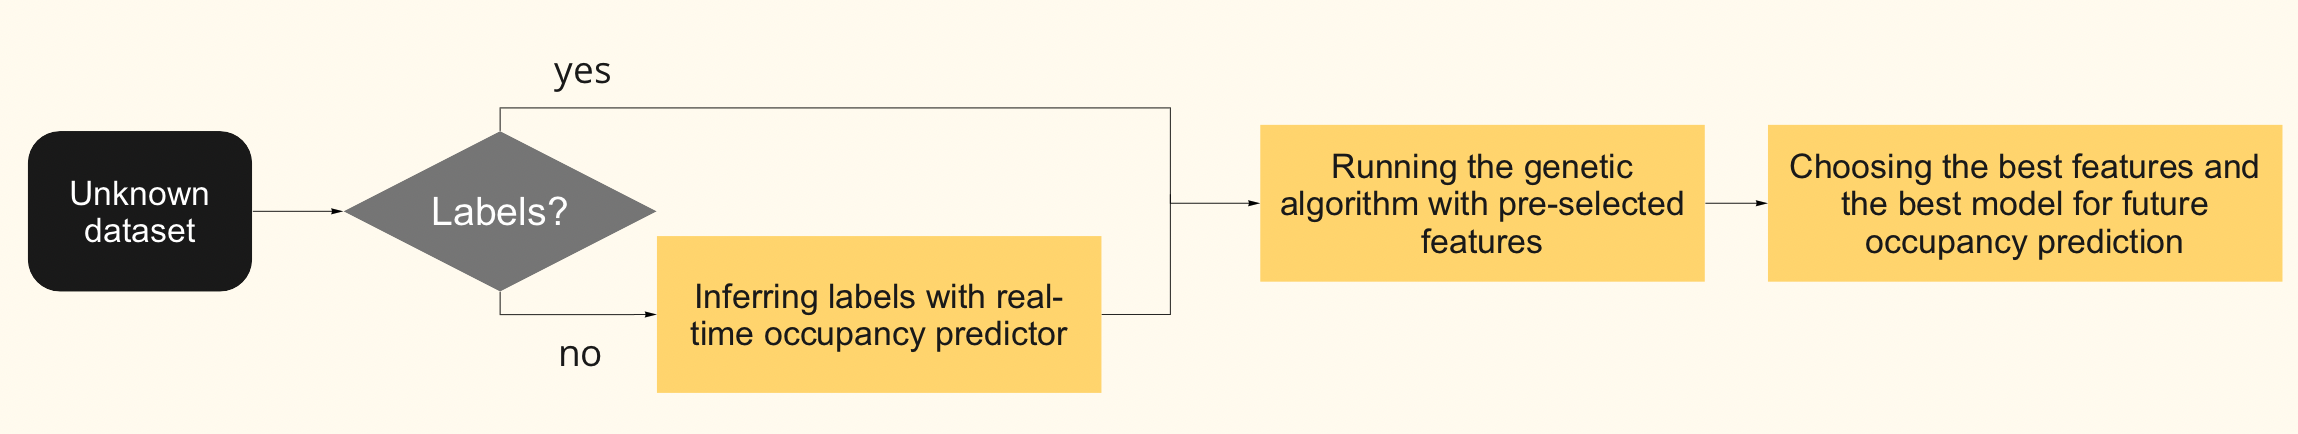

We use the data from a single household of CBT dataset to demonstrate, how the agent handles the unknown data and builds the model, which is fit to make predictions specifically for the house the data comes from. 

Unfortunally, we always face the problem of the data format that differs critically from dataset to dataset. That is why we employ semi-automaated approach: the data is manually brought to the proper format, while all other steps are conducted automatically. 

In [ ]:
# manual processing of the data

data_cbt = pd.read_csv("CBT/File1.txt", delim_whitespace=True, header=None)

data_cbt.rename(columns={0:"Meter",1:"datetime",2:"Power"},inplace=True)

# preprocessing steps to fit into our pipeline

data_cbt['datetime']= data_cbt['datetime'].astype(str)
data_cbt['day'] = data_cbt['datetime'].str.slice(stop=3)
data_cbt['time'] = data_cbt['datetime'].str.slice(start=3)
strt_date = date(2009, 1, 1)
data_cbt['day']=[x.rjust(3+len(x),"0") for x in data_cbt['day']]
res_date=[strt_date+ timedelta(days=int(x)-1) for x in data_cbt['day']]
data_cbt['date']= [x.strftime("%d-%m-%Y") for x in res_date]

data_cbt['time']= data_cbt['time'].astype(str).astype(int)
data_cbt['date'] = pd.to_datetime(data_cbt['date'])

# picking a random Household from the file

home_cbt = data_cbt.loc[data_cbt['Meter']==1000]
home_cbt['hour'] = (home_cbt['time'] - 1) // 2
home_cbt = home_cbt.groupby(by = ['date','hour']).sum()['Power']
home_cbt = pd.DataFrame(home_cbt)
home_cbt.reset_index(inplace=True)

# removing nonsensical data

home_cbt = home_cbt[home_cbt['hour'] < 24]
home_cbt = home_cbt.dropna()

# scaling
scaler = StandardScaler()
home_cbt['total_usage'] = scaler.fit_transform(
                    np.array(home_cbt['Power']).reshape(-1, 1)
                    )

# finalizing
home_cbt.reset_index(inplace=True, drop=True)
home_cbt = home_cbt[['date','hour','total_usage']]
home_cbt['dataset'] = 'CBT'
home_cbt['home'] = 1000

The extensive function below, the prototype of our multi-model agent, compiles together all our achivements. It builds a new model that predicts the probabilities of future occupancy from scratch using our pretrained models and developed features as well as building other features and parameters fit specifically to the new data. 

The function performs the operations that have been discussed above: inferring the labels with our designed model, tuning the hyperparameters of baseline, choosing the best one, running the genetic algorithm on new data to develop additional features, choosing the best algorithm for the final model. 

The user also have the choice not to label the data, rather use our pretrained future occupancy predictor without additional customization. If the user chooses to label the data or the data comes with labels (for example, from the system of smart sensors in the house or smart devices), then the user have a choice to develop new set of tailored genetic features or to used the one developed by us and to use the labels to choose the algorithm for the final model with the highest value of performance metric.

As the result, user gets the updated future occupancy predictor which is ready to make the prediction for new data points.

In [ ]:
#@title Function that implements the multi-model agent for house occupancy prediction { form-width: "1%" }
import joblib
from datetime import datetime, timedelta

import random

import gp_features
from gp_features._program import _Program
from gp_features.genetic import evolution


def agent(df, labelled = False):
    print('\nProcessing the data...')
    dataset, baseline_features, select_values = get_baseline_features_and_data(df, labelled=False)
    
    if not labelled:
        answer = input("Label the data? (Y/N): ")
    else: 
        answer == 'N'
        
    if answer == 'Y':
        
        print('Inferring the labels...')
        lightgbm_infer = joblib.load('lightgbm_infer.pkl')     
        gp_infer = joblib.load('programs_infer.pkl')
        program_desc = [x.program for x in gp_infer]
        
        programs_infer = []
        for feature in program_desc:
            program_infer = _Program(
                         function_set = ['mean','range','sd',
                                         'sad','min','max',
                                         'sum','ratio','add',
                                         'greater','lesser'],
                         arities = {
                                    'ratio':2,
                                    'mean':1, 
                                    'range':1,
                                    'sd':1,
                                    'sad':1,
                                    'min':1,
                                    'max':1,
                                    'sum':1,
                                    'add':2,
                                    'greater':2,
                                    'lesser':2
                        },
                         df = dataset,
                         select_values = select_values,
                         init_depth = (1,5),
                         init_method = 'half and half',
                         p_point_replace = 0.05,
                         parsimony_coefficient = 0.0005,
                         n_features = 1,
                         first_gen=0,
                         random_state = np.random.RandomState(29029),
                         feature_names=['total_usage'], program=feature
                         )
    
            programs_infer.append(program_infer)
        
        X = dataset[baseline_features].values
        
        for program in programs_infer:
            X = np.append(X, np.reshape(program.execute(), (-1, 1)), axis=1) 
            
        X = X[:,[11, 12, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]]
      
        dataset['target'] = lightgbm_infer.predict(X)
        
    print('\nBuilding the dataset for the predictions of future house occupancy...')
    dataset_fut = dataset.append([dataset]*23,ignore_index=True) 
    dataset_fut['lag'] = dataset_fut.index // (dataset_fut.shape[0]/24)
    dataset_fut['datehour'] = dataset_fut['datehour'].values.astype('datetime64')
    dataset_fut['time_of_prediction'] = list(map(lambda x, y: x - timedelta(hours = y), 
                                                 dataset_fut['datehour'], dataset_fut['lag'])) 
    
    
    ftrs = ['dataset','home','date','datehour',
        'time_of_prediction','lag','month','weekday','weekend','hour','night'] + [
    'usage_' + str(i) for i in range(-24,0)] + ['cv_index']
    if labelled or (answer == 'Y'):
        ftrs += 'target'
    dataset_fut['cv_index'] = dataset_fut['month']
    dataset_fut = dataset_fut[ftrs] 
    
    dataset_fut['usage_day_ago'] = dataset_fut['usage_-24']
    past_usage = ['usage_' + str(i) for i in range(-24,0)] 
    
    dataset_fut.sort_values(by = ['lag','home','date','hour',], ignore_index=True, inplace=True)
    past_values = dataset_fut[dataset_fut['lag'] == 0][['time_of_prediction','home'] + past_usage]
    dataset_fut.drop(past_usage, axis=1, inplace=True)
    dataset_fut = dataset_fut.merge(past_values, how='left', on=['time_of_prediction','home'])
    del past_values
    
    dataset_fut.dropna(inplace=True)
    dataset_fut.sort_values(by = ['home','time_of_prediction','lag',], ignore_index=True, inplace=True)
    dataset_fut.reset_index(inplace=True)
    
    select_values_fut = dataset_fut[past_usage].values.T
    
    baseline_features_fut = ['lag','month', 'weekend', 'hour', 'usage_day_ago', 
                          'usage_-10', 'usage_-9', 'usage_-8', 'usage_-7',
                          'usage_-6', 'usage_-5', 'usage_-4', 'usage_-3', 
                          'usage_-2', 'usage_-1']
    
    X_fut = refit_fut[baseline_features_fut].values
    if labelled or (answer == 'Y'):
        
        y_fut = refit_fut['target'].values
        
        print('\nTuning the hyperparameters of the baseline models...')

        models = {}

        print('\nTuning the hyperparameters of the LGB baseline...')

        import lightgbm
        dtrain_fut = lightgbm.Dataset(X_fut, label=y_fut)

        import optuna.integration.lightgbm as lgb
        params = {
            "objective": "binary",
            "metric": "auc",
            "verbosity": -1,
            "boosting_type": "gbdt",
        }


        tuner_fut = lgb.LightGBMTunerCV(
            params, dtrain_fut, verbose_eval=100, early_stopping_rounds=100, folds=KFold(n_splits=4)
        )
        tuner_fut.run()

        fut_best_params = tuner_fut.best_params

        fut_best_params['colsample_bytree'] = fut_best_params.pop('feature_fraction')
        fut_best_params['reg_alpha'] = fut_best_params.pop('lambda_l1')
        fut_best_params['reg_lambda'] = fut_best_params.pop('lambda_l2')
        fut_best_params['subsample_freq'] = fut_best_params.pop('bagging_freq')
        fut_best_params['subsample'] = fut_best_params.pop('bagging_fraction')

        lgb_fut = lightgbm.LGBMClassifier(**fut_best_params)

        models['lgb'] = lgb_fut

        print('\nTuning the hyperparameters of the Random Forest baseline...')
        
        # tuning hyperparameters of RF

        import optuna
        from sklearn import linear_model
        from sklearn import ensemble
        from sklearn import datasets
        from sklearn import model_selection


        def objective(trial):

            classifier_name = trial.suggest_categorical("classifier", ["LogReg", "RandomForest"])

            # Step 2. Setup values for the hyperparameters:
            if classifier_name == 'LogReg':
                logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
                classifier_obj = linear_model.LogisticRegression(C=logreg_c)
            else:
                rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
                rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
                classifier_obj = ensemble.RandomForestClassifier(
                    max_depth=rf_max_depth, n_estimators=rf_n_estimators
                )


            score = model_selection.cross_val_score(classifier_obj, X_fut, y_fut, n_jobs=-1, cv=KFold(n_splits=4))
            accuracy = score.mean()
            return accuracy

        study_fut = optuna.create_study(direction="maximize")
        study_fut.optimize(objective, n_trials=100)
        
        rf_fut = ensemble.RandomForestClassifier(
            max_depth=study_fut.best_params["rf_max_depth"], 
            n_estimators=study_fut.best_params["rf_n_estimators"]
        )
        
        models['rf'] = rf_fut
        
        print('\nTuning the hyperparameters of the KNN baseline...')
        
        from sklearn import neighbors
        
        aucs = {}
        for i in range(1,200):
    
        model = neighbors.KNeighborsClassifier(n_neighbors=i)
        print(f"Values of AUROC for KNN with {i} neighbours")
        aucs[i] = cv_acc_auc(model, X_fut, y_fut, dataset_fut)
        
        knn_fut = neighbors.KNeighborsClassifier(n_neighbors=max(aucs, key = aucs.get))
        
        models['knn'] = knn_fut
        
        from sklearn.svm import SVC
        svm_fut = SVC(kernel='rbf',probability=True)
        models['svm'] = svm_fut
        
        
        print('\nChoosing the best model...')    
        model_aucs = {}
        
        print('\nEvaluation the performance of LGB...')        
        model_aucs['lgb'] = cv_acc_auc(lgb_fut, X_fut, y_fut, dataset_fut)[0]
        
        print('\nEvaluation the performance of rf...')        
        model_aucs['rf'] = cv_acc_auc(rf_fut, X_fut, y_fut, dataset_fut)[0]
        
        print('\nEvaluation the performance of KNN...')        
        model_aucs['knn'] = cv_acc_auc(knn_fut, X_fut, y_fut, dataset_fut)[0]
        
        print('\nEvaluation the performance of SVM...')        
        model_aucs['svm'] = cv_acc_auc(lgb_fut, X_fut, y_fut, dataset_fut)[0]
        
        print(f"\nThe chosen algorithm is {max(model_aucs, key = model_aucs.get)}")
        model =  models[max(model_aucs, key = model_aucs.get)]    
        
        answer_gp = input("\nEngineer new features with genetic algorithm? (Y/N): ")
    
        if answer_gp == 'Y':
            
            print('\nRunning the evolution...')
            
            future_gp_features = evolution(
            X=dataset_fut['usage_-1'].values, y=dataset_fut['target'].values, 
            df=dataset_fut, select_values=select_values_fut,
            baseline_features=baseline_features_fut, 
            model=model,
            train_fraction = 0.75,
            population_size=100,
            hall_of_fame=100,
            generations=100,
            tournament_size=5,
            init_depth=(3, 3),
            init_method='half and half',
            feature_names=['usage_-1'],
            p_crossover=0.8,
            p_subtree_mutation=0.05,
            p_hoist_mutation=0,
            p_point_mutation=0.1,
            p_point_replace=0.33,
            parsimony_coefficient=0.0001,
            random_state=1117,
            n_jobs=10,
            warm_start=True, low_memory=False,
            verbose=1, programs=None, future=True)
            
            joblib.dump(future_gp_features, 'gp_features.pkl')
            
            print('\nSearching for the optimal set of features...')
            search_params_fut = {
                "X":X_fut,
                'y':y_fut,
                'model':model,
                'df':dataset_fut
            }
            
            select_feature_fut = feature_set_search(future_programs, max_set_size=10, 
                                                    n_iterations = 1000, seed=256, **search_params_fut)
            
            print(f"The chosen genetically engineered features are {*[x.__str__() for x in select_feature_fut]}
            
            joblib.dump(select_feature_fut, 'gp_features_select.pkl')
        
        elif answer_gp == 'N':
            
            print('\nUploading the genetic features...')
            features_fut = joblib.load(select_feature_fut, 'gp_features_select.pkl')  
                  
            choice_fut = [4,18,2,1,17]
            opt_set_fut = [x for x in features_fut if features_fut.index(x) in choice_fut]
              
            program_desc = [x.program for x in opt_set_fut]
            select_feature_fut = []
            for feature in program_desc:

                program_fut = _Program(
                             function_set = ['mean','range','sd',
                                             'sad','min','max',
                                             'sum','ratio','add',
                                             'greater','lesser'],
                             arities = {
                                        'ratio':2,
                                        'mean':1, 
                                        'range':1,
                                        'sd':1,
                                        'sad':1,
                                        'min':1,
                                        'max':1,
                                        'sum':1,
                                        'add':2,
                                        'greater':2,
                                        'lesser':2
                            },
                             df = dataset,
                             select_values = select_values,
                             init_depth = (1,5),
                             init_method = 'half and half',
                             p_point_replace = 0.05,
                             parsimony_coefficient = 0.0005,
                             n_features = 1,
                             first_gen=0,
                             random_state = np.random.RandomState(29029),
                             feature_names=['total_usage'], program=feature
                             )

                select_feature_fut.append(program_fut)                       
                  
        else: 
            raise ValueError("The possible answers are \'Y\' or \'N\")
                             
        for program in select_feature_fut:
            X_fut = np.append(X_fut, np.reshape(program.execute(), (-1, 1)), axis=1) 
                             
        print('\nChoosing the best final model...')
        model_aucs = {}
        
        print('\nEvaluation the performance of LGB...')       
        model_aucs['lgb'] = cv_acc_auc(lgb_fut, X_fut, y_fut, dataset_fut)[0]
        
        print('\nEvaluation the performance of rf...')       
        model_aucs['rf'] = cv_acc_auc(rf_fut, X_fut, y_fut, dataset_fut)[0]
        
        print('\nEvaluation the performance of KNN...')
        model_aucs['knn'] = cv_acc_auc(knn_fut, X_fut, y_fut, dataset_fut)[0]
        
        print('\nEvaluation the performance of SVM...')        
        model_aucs['svm'] = cv_acc_auc(lgb_fut, X_fut, y_fut, dataset_fut)[0]
        
        print(f"\nThe chosen algorithm is {max(model_aucs, key = model_aucs.get)}")                            
        model =  models[max(model_aucs, key = model_aucs.get)]  
                             
        model.fit(X_fut, y_fut)                

    elif answer == 'N':
        model = joblib.load('lightgbm_fut.pkl')
        
    else:
        raise ValueError("The possible answers are \'Y\' or \'N\")
        
    return model

In [ ]:
# produces the trained model which is ready to produce the predictions
home_cbt_predictor = agent(home_cbt)

# 5. Discussion and conclusion

In this final section of the notebook, we go over the methodology of our approach, the results and performance of our models and some discussion around what else can be done as inspiration for further research projects.

Given that labeled datasets that indicate if a household is occupied or not are extremely rare and costly to mantain (either with the use of sensor data, using smarthone data or manual input of the residents), our mixed approach of using models trained on labeled datasets and inferring ocupation based predominantly on electricity consumption and features derivated from it thanks to our genetic algorithm showed promising results.

While the baseline model (using only electricity consumption and some features manually engineered) performed acceptably, the inclusion of the features generated by the genetic programming algorithm meant an increase in the predictive performance of the model. Due to time constraints and computing power we could not explore additional variations and experiments of the genetic feature engineering. 

We corroborated our initial suspicion that the further in the future we make our prediction, the weaker the predictions are, still taking into account the patterns of the data (same routine on weekdays, different behavior on weekends, night hours with low consumption, etc).  We introduced different lag variables to account for that loss of predicting power. 

We found that the performance of our model is satisfying, as training the model on 3 different datasets with plenty of different households, sizes, magnitudes and characteristics could make our label predictions highly generalisable.

While we tried to automate the majority of the process, there are some steps which require some manual preprocessing, making this one of our shortcomings in our project. Given that each dataset, and each home has a somewhat different data recollection process, there is some work to be done on the dataset before applying our model. Understanding the data structure, checking if there are any missing timeslots in the data recollection, and even the right measuring unit of electricity consumption (e.g kW/h vs. W/h) is a process we are yet to automise.

Another factor that might be worth exploring further is integrating the use of weather data into the model. During several rounds of testing we faced some difficulties with the validity of the data fetched from an open source Weather API, as the precise location of the homes in the different datasets is not completely disclosed. 

While Becker and Kleiminger (2018) sustain that highly coarse  data performs comparably to fine-grained data, they use 30 min intervals instead of the highest frequency possible (depending on the dataset), we believe that, as the adoption rate of smart meters rises, more available datasets with high interval measurements will be made available. This, in turn, will make capturing intra-hour fluctuations more easily.

Last but not least, it is worth mentioning that while the design of the model that produces multiple predictions for the different points in future as binary classifier has proven to be reasonable, we still believe that some other approached to the model architecture and methodology can be tested. The proper options for the task would be survival analysis or some Bayesian model.


# References

Ardakanian, O., Bhattacharya, A., & Culler, D. (2016). Non-Intrusive Techniques for Establishing Occupancy Related Energy Savings in Commercial Buildings. Proceedings of the 3rd ACM International Conference on Systems for Energy-Efficient Built Environments, 21–30. https://doi.org/10.1145/2993422.2993574


Becker, Vincent, and Wilhelm Kleiminger. ‘Exploring Zero-Training Algorithms for Occupancy Detection Based on Smart Meter Measurements’. Computer Science - Research and Development 33, no. 1 (1 February 2018): 25–36. https://doi.org/10.1007/s00450-017-0344-9.


Beltran, A., Erickson, V. L., & Cerpa, A. E. (2013). ThermoSense: Occupancy Thermal Based Sensing for HVAC Control. Proceedings of the 5th ACM Workshop on Embedded Systems For Energy-Efficient Buildings - BuildSys’13, 1–8. https://doi.org/10.1145/2528282.2528301

Commission for Energy Regulation (CER). (2012). CER Smart Metering Project - Electricity Customer Behaviour Trial, 2009-2010 [dataset]. 1st Edition. Irish Social Science Data Archive. SN: 0012-00. https://www.ucd.ie/issda/data/commissionforenergyregulationcer/ Access date: 19 August 2021

Introduction to GP — gplearn 0.4.1 documentation. (n.d.).  2021, from https://gplearn.readthedocs.io/en/stable/intro.html Access date 1 August 2021

Jin, M., Jia, R., Kang, Z., Konstantakopoulos, I. C., & Spanos, C. J. (2014). PresenceSense: Zero-training algorithm for individual presence detection based on power monitoring. Proceedings of the 1st ACM Conference on Embedded Systems for Energy-Efficient Buildings, 1–10. https://doi.org/10.1145/2674061.2674073


Jun, J., Gu, Y., Cheng, L., Lu, B., Sun, J., Zhu, T., & Niu, J. (2013). Social-Loc: Improving indoor localization with social sensing. Proceedings of the 11th ACM Conference on Embedded Networked Sensor Systems - SenSys ’13, 1–14. https://doi.org/10.1145/2517351.2517352


IoT Analytics. ‘Smart Meter Market 2019: Global Penetration Reached 14% – North America, Europe Ahead’, 13 November 2019. https://iot-analytics.com/smart-meter-market-2019-global-penetration-reached-14-percent/. Access date: 16 May 2021.

Optuna: A hyperparameter optimization framework—Optuna 2.9.0 documentation. (n.d.). Retrieved August 2, 2021, from https://optuna.readthedocs.io/en/stable/#

Pratama, A., Widyawan, W., Lazovik, A., & Aiello, M. (2018). Multi-User Low Intrusive Occupancy Detection. Sensors, 18(3), 796. https://doi.org/10.3390/s18030796


Radu, V., Katsikouli, P., Sarkar, R., & Marina, M. K. (2014). A semi-supervised learning approach for robust indoor-outdoor detection with smartphones. Proceedings of the 12th ACM Conference on Embedded Network Sensor Systems, 280–294. https://doi.org/10.1145/2668332.2668347

Razavi, R., Gharipour, A., Fleury, M., & Akpan, I. J. (2019). Occupancy detection of residential buildings using smart meter data: A large-scale study. Energy and Buildings, 183, 195–208. https://doi.org/10.1016/j.enbuild.2018.11.025

